
---



<font size=8> Exploratory Data Analysis (EDA) </font>

# Introduction

## Objectifs de l'EDA

L'objectif de l'**analyse exploratoire des données** est de transformer les observations brutes en informations : trouver des patterns, des tendances et des relations entre les données. 

De nombreux outils statistiques existent pour résumer et organiser votre ensemble de données. Cela est utile pour l'étape suivante : aide à la prise de décision.

## Statistiques descriptives vs statistiques inférentielles

- **Statistiques descriptives :** description et interprétation des données pour résumer ou représenter les données disponibles (sans tenter de faire des inférences, c'est à dire extrapoler les résultats de l'échantillon à l'ensemble de la population).


- **Statistiques inférentielles :** Mise en place d'un cadre théorique, de modèles pour prendre des décisions et faire des prédictions basées sur des lois de probabilités.

<br> 

**Réferences**
- https://towardsdatascience.com/intro-to-descriptive-statistics-252e9c464ac9
- https://medium.com/@himanshuxd/the-guide-to-rigorous-descriptive-statistics-for-machine-learning-and-data-science-9209f88e4363

## Vocabulaire : quelques termes courants de machine learning

Les principaux à retenir pour le moment :

- **Observation** : point de données ou ligne dans un jeu de données.


- **Attribut** = qualité décrivant une observation (par exemple couleur, taille, poids) (en-têtes de colonnes)


- **Feature** = un attribut + sa valeur (la couleur est un attribut, la "couleur bleue" est une caractéristique)


- **Dimension** = nombre d'attributs différents dans le jeu de données pour une même observation

<br> 

**Ressource :**
- https://ml-cheatsheet.readthedocs.io/en/latest/glossary.html


## EDA Checklist

Lorsque vous décrouvrez un nouveau jeu de données, différentes étapes sont à réaliser dans un premier temps afin d'appréhender le genre de données auquel on a à faire :

### Première observation du dataset

    a. Charger les données dans une structure de données adaptée (dans notre cas ce sera un dataframe)
    
    b. Regarder la documentation du dataset si elle existe (si vous ne le faîtes pas vous serez  
       clairement considéré comme un débutant...) 
       Quel est le sens de chacune des colonnes ?  
       Quels choix ont été faits lors de la collecte des données ? 
       Quelles sont les limites du dataset ? 
    
    c. Regarder les données droits dans les yeux. Quelles sont les valeurs et leur type ? A quoi  
       ressemblent les données ? Quelle est la taille du dataset ?
    
    c. Cette étape vous permet également de planifier la suite de l'exploration : les données sont-elles 
       quantitatives ? Qualitatives ? Continues ? Discrètes ? Quelle est l'emprise mémoire de cette base 
       de données ? Suis-je capable de la charger en entier dans la RAM ? 

### Préparer les données

Le but à cette étape est de préparer les données pour pouvoir les analyser par la suite. 

    a. Y a-t-il des valeurs manquantes ? Combien ? Lesquelles ? 
       Avez-vous une idée de pourquoi certaines données sont manquantes ? 
       Puis-je les remplacer, ou dois-je les laisser telles quelles ? 
    
    b. Les données sont-elles consistantes (homogènes) ? 
       Le format des données est-il toujours le même (par exemple : normaliser les strings) ? 
       Y a-t-il des erreurs dans la base de données / données absurdes ? 
    
    c. Le format des données est-il adapté aux données ? 
       Les dates seront passées au format DateTime, les valeurs numériques 
       seront au format numérique (int64, float64, ...) et pas en "object" par exemple). 
       Les données catégoriques seront passées en categorical, etc...
       
    d. Y a-t-il des colonnes inutiles/ inutilisables/ que vous ne souhaitez pas utiliser ?  

### Statistiques univariée des données

    a. Regarder les répartitions de vos données :
       Vous pouvez tracer des histogrammes, boxplots, ...
    
    b. Tracer des courbes qui vous paraissent intéressantes (sur une ou plusieurs colonnes)
    
    c. Observez-vous des tendances ? 
       Les données sont-elles conformes à votre intuition ? 
       Des choses intrigantes ? 

    d. Calculez certaines grandeurs (moyennes, skewness, kurtosis, standard deviation, ...) 
    
    e. Identifier et observer les outliers dans vostre dataset. C'est important de savoir qui ils sont.  

### Statistiques multivariées des données

L'analyse multivariée désigne l'ensemble des méthodes descriptives, explicatives et graphiques utilisées pour traiter simultanément plusieurs variables. 

L'objectif est de mettre en évidence certaines relations entre variables (corrélation par exemple) et d'étudier le poids relatif de certaines variables dans l'étude d'un problème donné. 

Types d'outils utilisés : 
    
    - Scatter Plots
    - Corrélation / Covariance
    - Normalisation des données
    - Réduction de la dimension des données 
    - ... 
    
Il existe de très nombreux outils, pratiques et théoriques, dans le domaine des statistiques multivariées. 

Ces outils doivent vous permettrent de mieux comprendre la relation entre données et d'élaborer des hypothèses statistiques sur vos données. 

Nous en explorerons quelques unes ici. 

<div class="alert alert-info"> 
<strong>Ressources utiles</strong> 

https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html<br/>

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
    
    
Par la suite si vous vous demandez quel graphique est le plus adapté à vos données, vous pouvez jeter un coup d'oeil ici : https://www.data-to-viz.com/

# Présentation du dataset (jeu de données)

Nous allons utiliser un dataset issu du fabuleux site <a href="https://www.gapminder.org/tools/#$model$markers$bubble$encoding$frame$speed:138&value=1800;;;;;&chart-type=bubbles&url=v1">**Gapminder**</a> (n'hésitez pas à y passer un peu de temps!)

Le dataset sera composé de : 
- L'espérance de vie par pays au cours du temps
- Le revenu moyen par habitant en dollar par pays au cours de 1800 à 2050. 

**Note :** <br/>
Vous suivre les mêmes étapes pour les deux datasets. 


**Documentation du dataset :** <br/>
https://www.gapminder.org/data/documentation/gd001/

Ce dataset est simple et va nous permettre de nous approprier les grands outils fondamentaux de la statistique descriptive. 

Ci-dessous vous trouverez une image issue du site GapMinder qui vous donnera un aperçu grandiose de ce qui est possible de faire en terme de visualisations de données.  

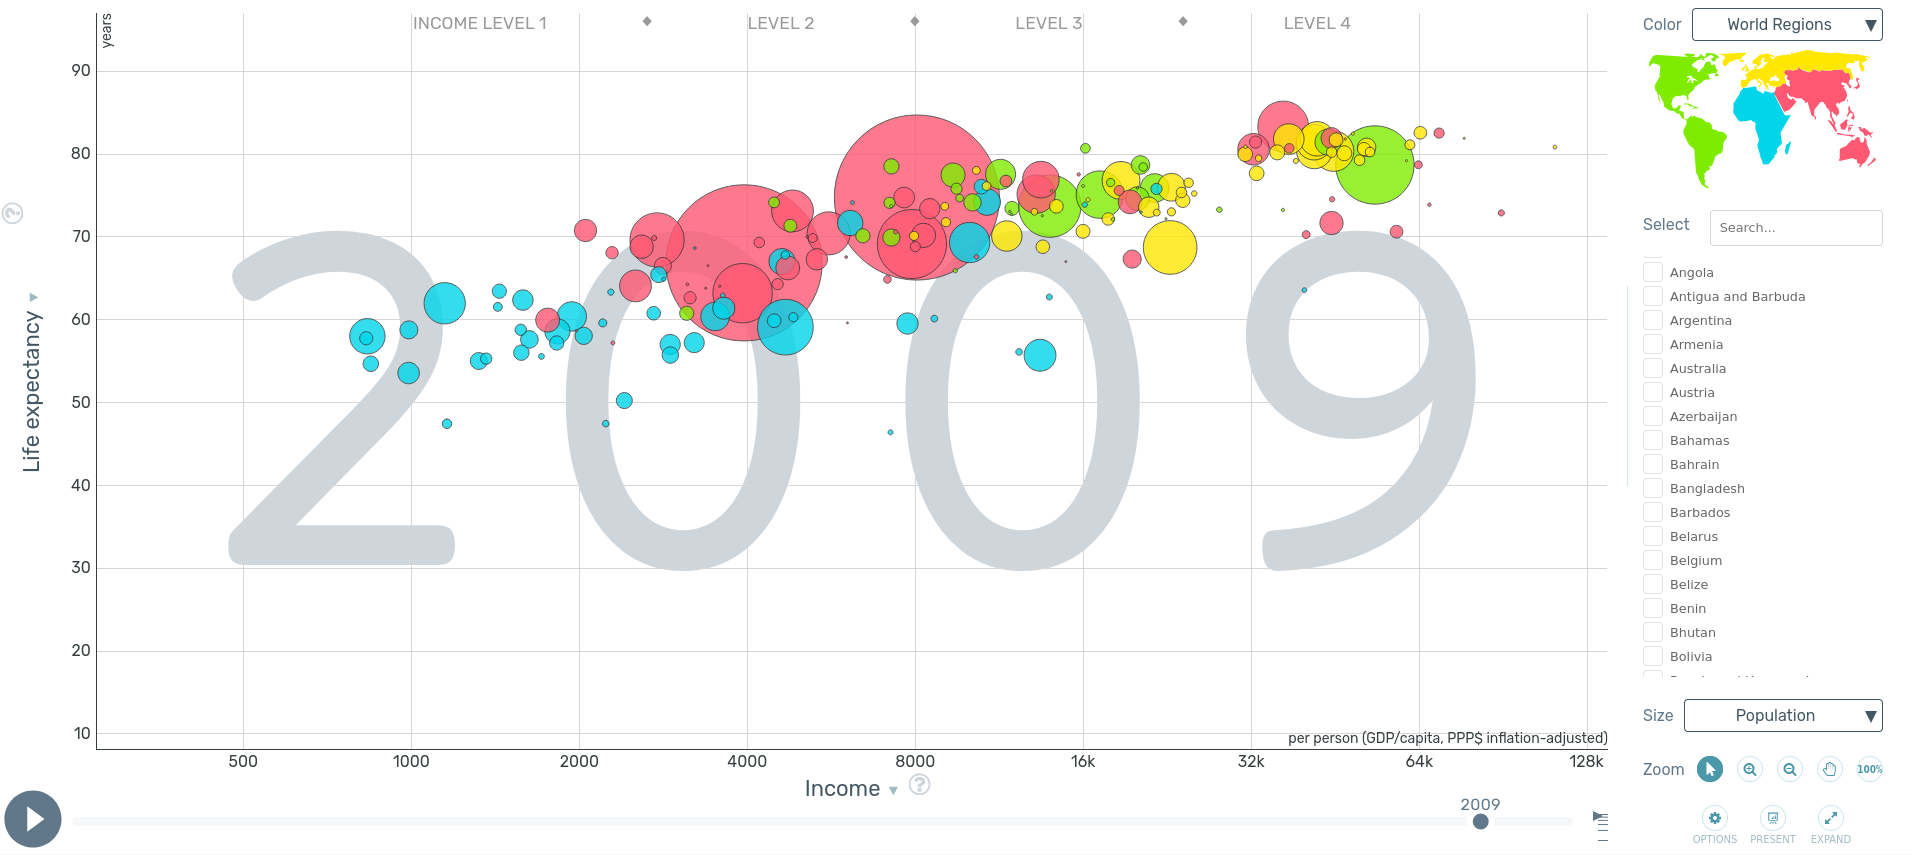

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

plt.rcParams["figure.figsize"] = [15, 9]
plt.rcParams["figure.facecolor"] = "#f1f3f9"

In [2]:
IMAGES_PATH = Path().resolve().parent / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Chargement des données et premier regard


&#x1F4A5; **To Do**


    - Charger les données
    
    - Afficher les 10 premiers éléments du dataframe
    
    - Afficher 5 éléments au hasard du dataframe
    
    - Afficher les 5 derniers éléments du dataframe
    
    - Afficher les informations générales sur le dataframe. Les types des données vous paraissent-ils cohérents ? 
    
    - Que remarquez-vous de bizarre ? 
    

In [3]:
data_path = Path().resolve().parent / "data" / "data_gapminder"

data = pd.read_csv(data_path/"income.csv")
life_data = pd.read_csv(data_path/"life_expectancy_years.csv")

In [4]:
data.head(10)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,683,683,683,683,683,683,683,683,683,...,2690,2750,2810,2870,2930,2990,3060,3120,3190,3260
1,Angola,700,702,705,709,711,714,718,721,725,...,8000,8170,8350,8530,8710,8900,9090,9280,9480,9690
2,Albania,755,755,755,755,755,756,756,756,756,...,25.1k,25.6k,26.2k,26.7k,27.3k,27.9k,28.5k,29.1k,29.7k,30.4k
3,Andorra,1360,1360,1360,1360,1370,1370,1370,1370,1380,...,68.9k,70.4k,71.9k,73.4k,75k,76.6k,78.3k,80k,81.7k,83.4k
4,United Arab Emirates,1130,1130,1140,1140,1150,1150,1160,1160,1160,...,101k,103k,105k,107k,110k,112k,114k,117k,119k,122k
5,Argentina,1730,1730,1740,1740,1750,1760,1760,1770,1770,...,30.5k,31.1k,31.8k,32.5k,33.2k,33.9k,34.7k,35.4k,36.2k,36.9k
6,Armenia,582,582,582,582,582,582,582,582,582,...,24.7k,25.2k,25.8k,26.3k,26.9k,27.5k,28.1k,28.7k,29.3k,29.9k
7,Antigua and Barbuda,857,857,857,857,857,857,857,858,858,...,26.4k,27k,27.6k,28.1k,28.8k,29.4k,30k,30.7k,31.3k,32k
8,Australia,925,930,936,941,947,952,956,962,968,...,72k,73.5k,75.1k,76.7k,78.4k,80.1k,81.8k,83.5k,85.3k,87.2k
9,Austria,2090,2100,2110,2120,2130,2130,2140,2150,2160,...,77.8k,79.5k,81.2k,83k,84.7k,86.6k,88.4k,90.3k,92.3k,94.3k


In [5]:
data.sample(n=5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
14,Burkina Faso,543,543,543,543,543,543,543,543,543,...,3460,3530,3610,3680,3760,3840,3930,4010,4100,4190
113,North Macedonia,781,781,781,781,781,782,782,782,782,...,28.4k,29k,29.6k,30.3k,30.9k,31.6k,32.3k,33k,33.7k,34.4k
41,Cuba,719,725,731,737,744,750,756,762,769,...,15.6k,16k,16.3k,16.6k,17k,17.4k,17.7k,18.1k,18.5k,18.9k
40,Costa Rica,877,877,877,877,877,878,878,878,878,...,32.4k,33.1k,33.9k,34.6k,35.3k,36.1k,36.9k,37.7k,38.5k,39.3k
141,North Korea,283,283,282,282,282,282,281,281,281,...,1490,1520,1560,1590,1620,1660,1700,1730,1770,1810


In [6]:
data.tail(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
190,Samoa,1590,1590,1590,1590,1590,1590,1590,1590,1590,...,8860,9050,9250,9440,9650,9860,10.1k,10.3k,10.5k,10.7k
191,Yemen,993,995,998,1000,1000,1010,1010,1010,1020,...,3750,3830,3910,3990,4080,4170,4260,4350,4440,4540
192,South Africa,1780,1760,1740,1720,1700,1610,1610,1750,1530,...,16.2k,16.6k,16.9k,17.3k,17.7k,18.1k,18.5k,18.8k,19.3k,19.7k
193,Zambia,751,753,755,756,758,760,762,764,765,...,4690,4790,4890,5000,5110,5220,5330,5440,5560,5680
194,Zimbabwe,984,985,986,987,988,989,991,992,993,...,4890,4990,5100,5210,5320,5440,5560,5670,5800,5920


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 252 entries, country to 2050
dtypes: int64(101), object(151)
memory usage: 384.0+ KB


Some columns are of the type "object", probably because of the usage of the letter 'k' to represent thousands like in "19.7k".

Certaines colonnes sont du type "objet", probablement à cause de l'utilisation de la lettre "k" pour représenter des milliers comme dans "19,7k".

In [8]:
data.isnull().sum().sum()

0

# Data Preparation 

Nous allons maintenant préparer les données pour pouvoir ensuite les analyser.

&#x1F4A5; **To Do**


    - Trouver les données manquantes s'il y en a. S'ils n'y en n'a pas, prouvez le. 
    
    - Trouver les données dupliquées s'il y en a. S'ils n'y en n'a pas, prouvez le. 
    
    - Réparer le dataset " Income " pour que le types de données soit le bon. Observez bien si vous ne l'avez pas encore remarqué que lorsque le revenu par habitant dépasse 10.000 dollars par an, la valeur est abrégée en "10k". Exemple : 156000 -> 15.6k. Ce n'est pas possible en l'état de faire des statistiques descriptives. Nous allons devoir "réparer" les colonnes
    
**Aide :** 

>Créer une fonction que vous appelerez `to_real_number` et qui prendra en paramètre un string. 
>Le rôle de cette fonction est de créer des nombres `int` à partir des valeurs `str` qui apparaissent. 
>
>Quelques exemples de valeurs à tester : <br/>
>`3200  --> 3200`  <br/>
>`12k   --> 12000` <br/>
>`23.6k --> 23600` <br/>

<br> 

**Ressources :** <br> 
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html 
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.convert_dtypes.html

    

In [9]:
len(data)-len(data.drop_duplicates())

0

In [10]:
data.duplicated().value_counts()

False    195
Name: count, dtype: int64

In [11]:
def to_real_number(row):

    new_row = row.copy()

    for i in range(len(row)):
        value = str(row[i])

        if value[-1:] == "k":
            new_row[i] = int(float(value[:-1])*1000)
        else:
            new_row[i] = int(value)
    return new_row
           
data_modified = data.copy()

dff = data_modified.loc[:, data_modified.columns != 'country'].apply(to_real_number, axis=1)
data_modified.update(dff)

/tmp/ipykernel_9476/1384708110.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = str(row[i])
/tmp/ipykernel_9476/1384708110.py:11: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  new_row[i] = int(value)
/tmp/ipykernel_9476/1384708110.py:9: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  new_row[i] = int(float(value[:-1])*1000)


In [12]:
cols = [i for i in data_modified.columns if i not in ["country"]]

for col in cols:
    data_modified[col] = pd.to_numeric(data_modified[col])

data_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 252 entries, country to 2050
dtypes: int64(251), object(1)
memory usage: 384.0+ KB


# Statistiques univariées

## Introduction aux statistiques univariées

On parle de **statistique univariée** lorsque l'on étudie une seule variable à la fois -- par opposition à l'analyse multivariée qui étudie la relation entre variables.

La statistique univariée fait partie du champs de la statistique descriptive. Les variables étudiées peuvent être qualitatives ou quantitatives. 

---

&#x1F4A5; **Les variables en statistique :**

Une variable est une caractéristique observée/ mesurée. Ces variables peuvent être **numériques** ou **qualitative** et se répartissent en 4 grands types différents. 

Les variables **numériques** sont de deux types : 

- **Discrète :** valeur numérique pouvant prendre un nombre fini de valeurs (dénombrable)


- **Continue :** valeur numérique pouvant prendre un nombre infini de valeurs (indénombrable)

Les variables **qualitatives (catégoriques)** sont de deux types : 

- **Ordinale :** les valeurs observées présentent une hiérarchie ( ex : froid < tiède < chaud )


- **Nominale :** les valeurs observée ne présentent pas de hiérarchie (ex : femme / homme / trans / non-binaire, ...) 


<img width=300 align="left" src='https://www.abs.gov.au/system/files/styles/complex_image/private/5d934d19134ec0c4c9e5e2e0b29a2663/Types%20of%20variables%20flowchart.png?itok=8jZ9sYaQ'>

<br style="clear:both" />

---

&#x1F4A5; **Outils de la statistique univariée :**

De nombreux outils existent pour décrire nos observations (données). Nous en verrons plusieurs ici : 

    - Minimum et Maximum
    - Mesures de tendance centrale : Moyenne, Médiane et Mode
    - Mesures de dispersion : percentiles, écart interquartile (IQR), écart-type (standard deviation)
    - Mesures de dispersion avancées : Skewness et Kurtosis. 
    - Visualisation : plot, boxplot et histogramme


## Minimum et Maximum 

&#x1F4A5; **To Do :**

    1. Afficher les 10 pays dont les revenus par habitant sont les plus élevés en 2022 (idem espérance de vie)

    2. Quel est le pays a été le plus de fois "le plus riche" au cours du temps ? 

    3. Même question que précédemment pour "le plus pauvre"

    4. Calculer et tracer l'écart entre le minimum et le maximum au cours du temps ? 

    5. Quelles sont vos premières conclusions conernant l'évolution des inégalités au cours du temps ? 

In [13]:
x = data_modified[["country", "2022"]].sort_values(by=["2022"], ascending=False)
x.head(10)

,country,2022
104,Luxembourg,119000
152,Singapore,113000
79,Ireland,107000
145,Qatar,95500
30,Switzerland,71700
107,Monaco,71600
129,Norway,67900
25,Brunei,65500
184,United States,65300
4,United Arab Emirates,65200


In [14]:
life_data_10_plus_esp_de_vie = life_data[["country", "2022"]].sort_values(by=["2022"], ascending=False)
life_data_10_plus_esp_de_vie.head(10)

,country,2022
152,Singapore,85.3
87,Japan,85.2
72,"Hong Kong, China",84.8
82,Iceland,84.5
30,Switzerland,84.4
53,Spain,83.5
84,Italy,83.5
83,Israel,83.5
129,Norway,83.4
104,Luxembourg,83.4


In [15]:
plus_riches_per_year = data_modified.copy()
plus_riches_per_year.set_index("country", inplace=True)
plus_riches_per_year = plus_riches_per_year.apply(lambda x: x.idxmax(), axis=0)
plus_riches_per_year

1800    Netherlands
1801    Netherlands
1802    Netherlands
1803    Netherlands
1804    Netherlands
           ...     
2046          Qatar
2047          Qatar
2048          Qatar
2049          Qatar
2050          Qatar
Length: 251, dtype: object

In [16]:
plus_riches_per_year.value_counts()

United Kingdom          67
Luxembourg              35
Brunei                  32
Qatar                   29
United States           22
Australia               17
Switzerland             16
United Arab Emirates    11
Netherlands              8
Kuwait                   6
Singapore                6
New Zealand              2
Name: count, dtype: int64

In [17]:
plus_pauvres_per_year = data_modified.copy()
plus_pauvres_per_year.set_index("country", inplace=True)
plus_pauvres_per_year = plus_pauvres_per_year.apply(lambda x: x.idxmin(), axis=0)
plus_pauvres_per_year.value_counts()

North Korea                 78
Mozambique                  61
Burundi                     42
Romania                     36
Lesotho                     11
Malawi                      10
Congo, Dem. Rep.             4
Afghanistan                  3
Liberia                      3
Central African Republic     2
Ethiopia                     1
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


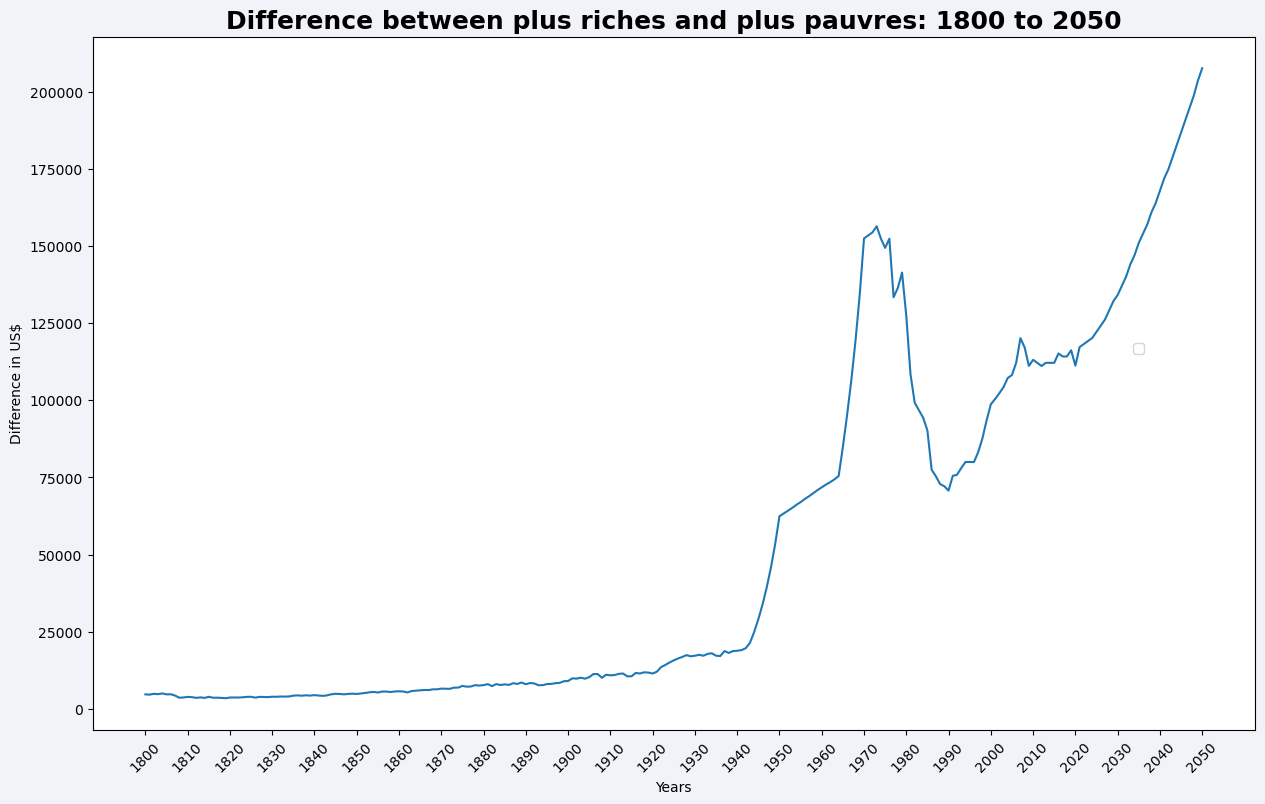

In [18]:
diff_df = data_modified.copy()
diff_df.set_index("country", inplace=True)
diff_df = diff_df.apply(lambda x: x.max(), axis=0) - diff_df.apply(lambda x: x.min(), axis=0)

diff_df = pd.DataFrame(diff_df, columns=["diff"])
diff_df = diff_df.rename_axis("annee").reset_index()

x_axis = [year for year in range(1800, 2051, 1)]

fig, ax = plt.subplots()

sns.lineplot(data=diff_df, x=x_axis, y="diff",
             ax=ax)
ax.legend(loc="center",
          bbox_to_anchor=(0.9, 0.3, 0, 0.5))
plt.xticks(x_axis, rotation=45)
ax.set(xlabel='Years', ylabel='Difference in US$')
ax.xaxis.set_ticks(np.arange(1800, 2051, 10))
plt.title("Difference between plus riches and plus pauvres: 1800 to 2050", fontsize=18, fontweight="bold")
#save_fig("bar_chart_Prudction_par_filieere_annee_2018")
plt.show()

it gets bigger and bigger

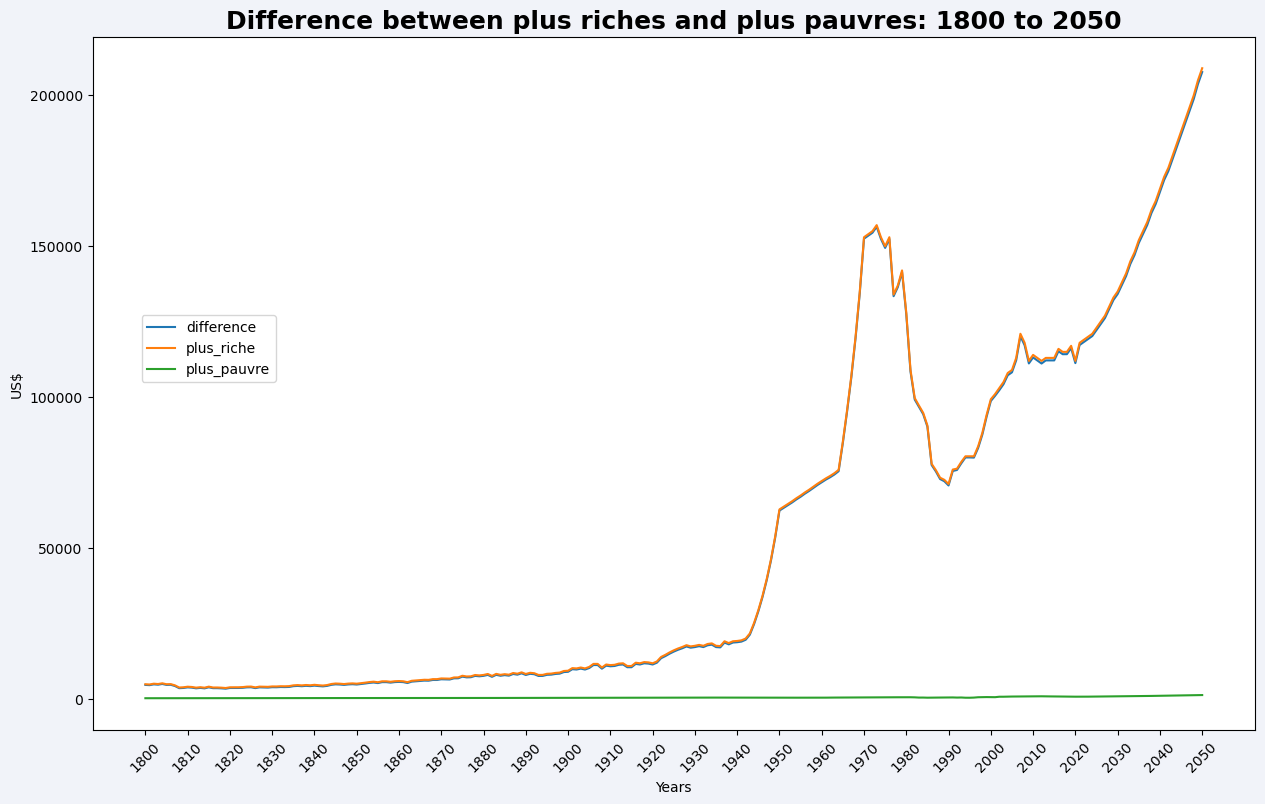

In [19]:
diff_df = data_modified.copy()
diff_df.set_index("country", inplace=True)
diff_df = diff_df.apply(lambda x: x.max(), axis=0) - diff_df.apply(lambda x: x.min(), axis=0)

diff_df = pd.DataFrame(diff_df, columns=["diff"])
diff_df = diff_df.rename_axis("annee").reset_index()

rich_df = data_modified.copy()
rich_df.set_index("country", inplace=True)
rich_df = rich_df.apply(lambda x: x.max(), axis=0)

rich_df = pd.DataFrame(rich_df, columns=["max"])
rich_df = rich_df.rename_axis("annee").reset_index()

poor_df = data_modified.copy()
poor_df.set_index("country", inplace=True)
poor_df = poor_df.apply(lambda x: x.min(), axis=0)

poor_df = pd.DataFrame(poor_df, columns=["min"])
poor_df = poor_df.rename_axis("annee").reset_index()

x_axis = [year for year in range(1800, 2051, 1)]

fig, ax = plt.subplots()

sns.lineplot(data=diff_df, x=x_axis, y="diff",
             ax=ax, label="difference")
sns.lineplot(data=rich_df, x=x_axis, y="max",
             ax=ax, label="plus_riche")
sns.lineplot(data=poor_df, x=x_axis, y="min",
             ax=ax, label="plus_pauvre")

ax.legend(loc="center",
          bbox_to_anchor=(0.1, 0.3, 0, 0.5))
plt.xticks(x_axis, rotation=45)
ax.set(xlabel='Years', ylabel='US$')
ax.xaxis.set_ticks(np.arange(1800, 2051, 10))
ax.xaxis.set_ticks(np.arange(1800, 2051, 10))
plt.title("Difference between plus riches and plus pauvres: 1800 to 2050", fontsize=18, fontweight="bold")
#save_fig("bar_chart_Prudction_par_filieere_annee_2018")
plt.show()

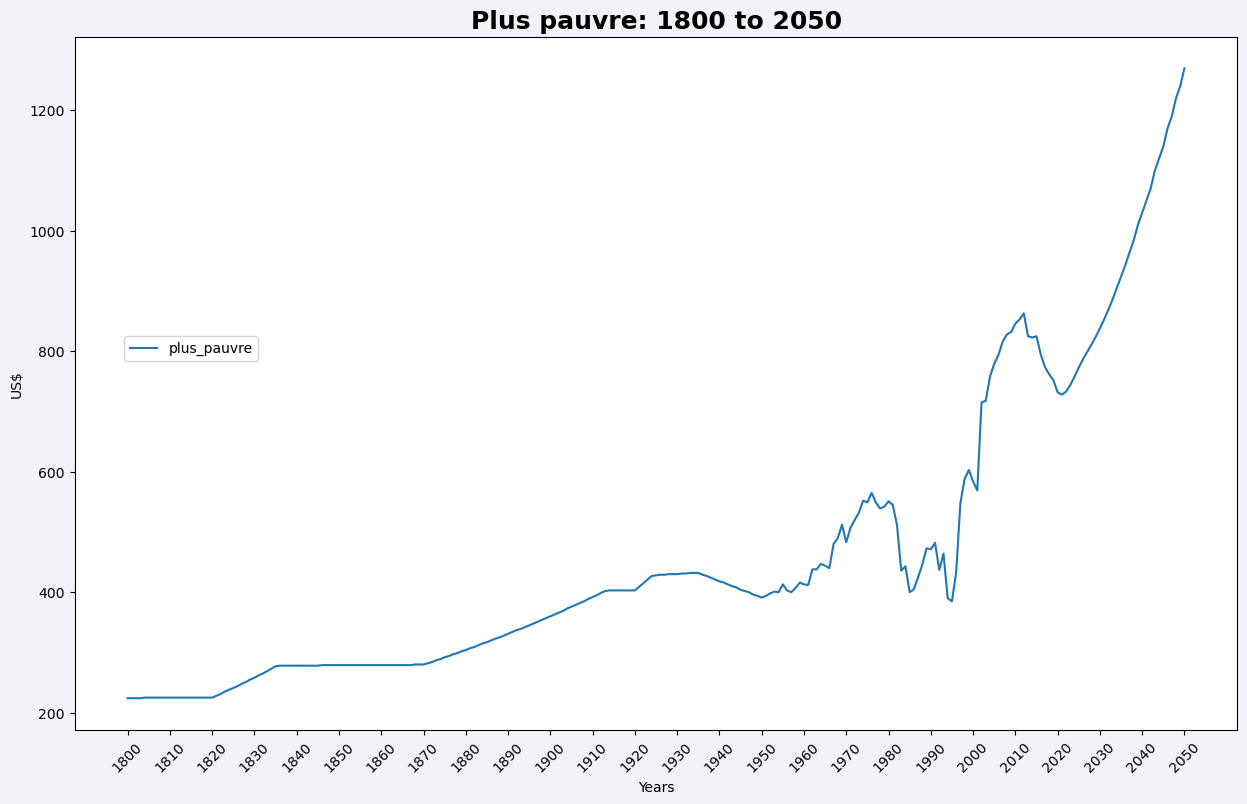

In [20]:
x_axis = [year for year in range(1800, 2051, 1)]

fig, ax = plt.subplots()

sns.lineplot(data=poor_df, x=x_axis, y="min",
             ax=ax, label="plus_pauvre")

ax.legend(loc="center",
          bbox_to_anchor=(0.1, 0.3, 0, 0.5))
plt.xticks(x_axis, rotation=45)
ax.set(xlabel='Years', ylabel='US$')
ax.xaxis.set_ticks(np.arange(1800, 2051, 10))
plt.title("Plus pauvre: 1800 to 2050", fontsize=18, fontweight="bold")
#save_fig("bar_chart_Prudction_par_filieere_annee_2018")
plt.show()

## Mesures de tendance centrale : Moyenne, Médiane et Mode

### Théorie

Une variable aléatoire est caractérisée par l'ensemble des valeurs qu'elle peut prendre et par la probabilité de ces valeurs. 

La **distribution** d'une variable est le profil des valeurs , c'est-à-dire l'ensemble formé de toutes les valeurs possibles et des fréquences associées à ces valeurs. Cette expression s'appelle la **loi de probabilité** (ou distribution de probabilité) de la variable aléatoire.

Trois **mesures de tendance centrale** existent pour décrire la distribution d'une variable aléatoire : 

<img width=500 align="left" src='https://miro.medium.com/max/750/1*HO8STTKaPuDHcYCu7TgDNg.png'>

<br style="clear:both" />

La **moyenne** est une mesure intuitive de la tendance centrale pour faire des hypothèses sur une population à partir d'un échantillon unique. A noter que la moyenne est plus affectée que la médiane par les **outliers** (valeurs très grandes, ou petites par rapport aux autres)


La **médiane** est telle que 50% des valeurs de l'échantillon sont inférieurs à la médiane, les 50% restants sont supérieurs à la médiane. Elle partage l'échantillon en 2 parties égales. Le principal avantage de la médiane sur la moyenne est qu'elle n'est pas affectée par la présence d'outliers. La médiane reflète mieux une valeur « typique » de l'ensemble. La médiane est souvent utilisée avec des distributions asymétriques (distributions que la moyenne représente mal)

Le **mode** (ou valeur dominante) est la valeur la plus représentée dans un échantillon. Par exemple pour les données `[ 3, 4, 4, 7, 0, 4, 6, 4 ]` le mode est **`4`**

**Ressource :** <br/>
- https://towardsdatascience.com/mean-median-mode-which-central-tendency-measure-to-use-when-9fb3ebbe3006

### Exercice d'application théorique 

Calculer **à la main** la moyenne, l,a médiane et le mode pour les valeurs suivantes : 

` data = [ 2, 4, 0, 7, 5, 4, 3, 0, 67, 5, 0, 0, 0]` 

In [21]:
import statistics as st

data = [ 2, 4, 0, 7, 5, 4, 3, 0, 67, 5, 0, 0, 0]

st.mean(data)

7.461538461538462

In [22]:
st.mode(data)

0

In [23]:
st.median(data)

3

### Exercice d'application pratique 

&#x1F4A5; **TODO**
        
    1. Afficher la moyenne et la médiane des revenus pour l'année 2022. Faire de même pour l'espérance de vie. 

    2. Comment expliquer une telle différence entre les valeurs ? 

    3. Pourquoi utiliser une mesure plutôt que l'autre ?

    4. Tracer l'évolution de la **moyenne**, du **mode** et de la **médiane** au cours du temps. 

    5. Basé sur ce que vous avez lu dans les ressources : 
        - A votre avis, quand est-ce que la moyenne et la médiane sont proches ?
        - Que pouvez-vous en déduire sur la "forme de la distribution" des revenus (symétrie) ? 

<br/>

**Ressources :** 
- https://www.statology.org/when-to-use-mean-vs-median/ 
- https://towardsdatascience.com/mean-median-mode-which-central-tendency-measure-to-use-when-9fb3ebbe3006
- https://towardsdatascience.com/statistics-01-mean-median-and-mode-d6d8597ed9f1 

In [24]:
data_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 252 entries, country to 2050
dtypes: int64(251), object(1)
memory usage: 384.0+ KB


In [25]:
data_modified.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,1072.179487,1071.353846,1074.210256,1073.753846,1075.430769,1075.174359,1076.169231,1076.251282,1066.497436,1067.553846,...,31265.887179,31926.969231,32628.666667,33321.482051,34038.717949,34775.692308,35524.302564,36288.200000,37069.538462,37862.666667
std,605.373041,602.816015,614.245612,608.330435,617.123397,610.442792,612.281097,606.053716,564.608763,569.926448,...,32907.181429,33561.829538,34317.547783,35048.003672,35799.737313,36575.963727,37360.004955,38162.971505,38986.791899,39818.346586
min,224.000000,224.000000,224.000000,224.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,...,1050.000000,1070.000000,1100.000000,1120.000000,1140.000000,1170.000000,1190.000000,1220.000000,1240.000000,1270.000000
25%,680.500000,680.500000,680.500000,680.500000,680.500000,680.500000,680.500000,680.500000,680.500000,680.500000,...,6550.000000,6690.000000,6840.000000,6985.000000,7135.000000,7290.000000,7445.000000,7610.000000,7770.000000,7935.000000
50%,959.000000,959.000000,959.000000,959.000000,954.000000,954.000000,956.000000,960.000000,960.000000,960.000000,...,20000.000000,20400.000000,20900.000000,21300.000000,21800.000000,22200.000000,22700.000000,23200.000000,23700.000000,24200.000000
75%,1240.000000,1240.000000,1240.000000,1245.000000,1250.000000,1250.000000,1255.000000,1255.000000,1255.000000,1255.000000,...,49150.000000,50250.000000,51300.000000,52400.000000,53550.000000,54750.000000,55900.000000,57100.000000,58350.000000,59550.000000
max,4860.000000,4780.000000,5040.000000,4930.000000,5170.000000,4860.000000,4900.000000,4490.000000,3780.000000,3850.000000,...,173000.000000,176000.000000,180000.000000,184000.000000,188000.000000,192000.000000,196000.000000,200000.000000,205000.000000,209000.000000


## Méthode 1

In [26]:
data_modified["2022"].describe()

count       195.000000
mean      21009.420513
std       22374.432864
min         733.000000
25%        4480.000000
50%       13200.000000
75%       31550.000000
max      119000.000000
Name: 2022, dtype: float64

## Méthode 2

In [27]:
data_modified["2022"].sum() / len(data_modified["2022"]) #mean

21009.420512820514

## Méthode 3

In [28]:
data_modified["2022"].mean(), data_modified["2022"].median()

(21009.420512820514, 13200.0)

## Méthode 4

In [29]:
median_2022 = data_modified["2022"].sort_values(ascending=True)
len(median_2022)

195

In [30]:
(len(median_2022) + 1) / 2

98.0

In [31]:
median_2022.tolist()[98]

13200

In [32]:
life_data["2022"].describe()

count    186.000000
mean      73.462903
std        6.854162
min       53.000000
25%       68.025000
50%       74.300000
75%       78.450000
max       85.300000
Name: 2022, dtype: float64

#### 2. Comment expliquer une telle différence entre les valeurs ?
#### 3. Pourquoi utiliser une mesure plutôt que l'autre ?

The standard deviation of the data regarding the GDP is too high and the difference between the maximum value and the minimum value is qlso really high; not just that, but the gaps in the percentiles increase higher and higher, it makes the biggest values have differences between themselves than the smaller values. The net result is that the median centralizes closer to smaller values while the mean is too sensitive to the biggest ones. It doesn't happen in the life expectancy data where gaps between percentiles has smaller jumps. 

## 4. Tracer l'évolution de la **moyenne**, du **mode** et de la **médiane** au cours du temps. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


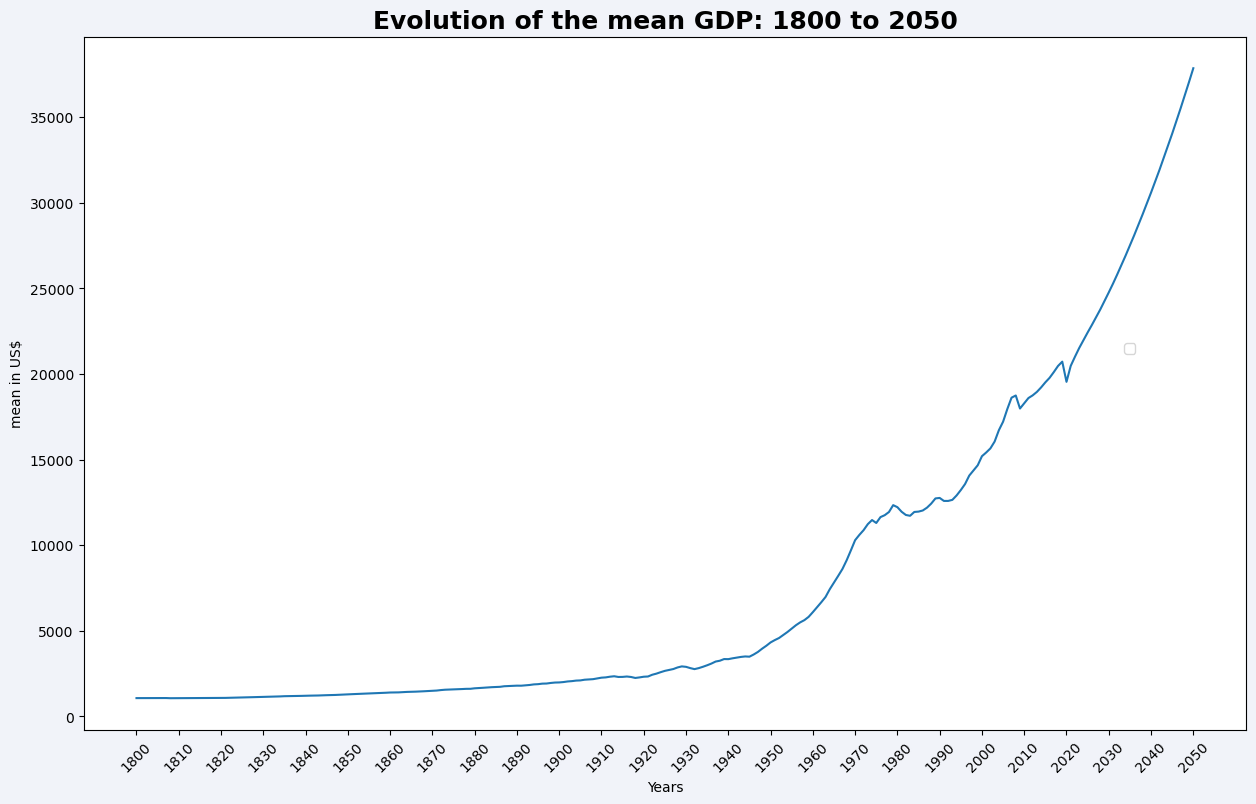

In [33]:
moyenne = data_modified.copy()
moyenne.set_index("country", inplace=True)
moyenne = moyenne.apply(lambda x: x.mean(), axis=0)

moyenne = pd.DataFrame(moyenne, columns=["mean"])
moyenne = moyenne.rename_axis("annee").reset_index()

x_axis = [year for year in range(1800, 2051, 1)]

fig, ax = plt.subplots()

sns.lineplot(data=moyenne, x=x_axis, y="mean",
             ax=ax)
ax.legend(loc="center",
          bbox_to_anchor=(0.9, 0.3, 0, 0.5))
plt.xticks(x_axis, rotation=45)
ax.xaxis.set_ticks(np.arange(1800, 2051, 10))
ax.set(xlabel='Years', ylabel='mean in US$')
plt.title("Evolution of the mean GDP: 1800 to 2050", fontsize=18, fontweight="bold")
#save_fig("bar_chart_Prudction_par_filieere_annee_2018")
plt.show()

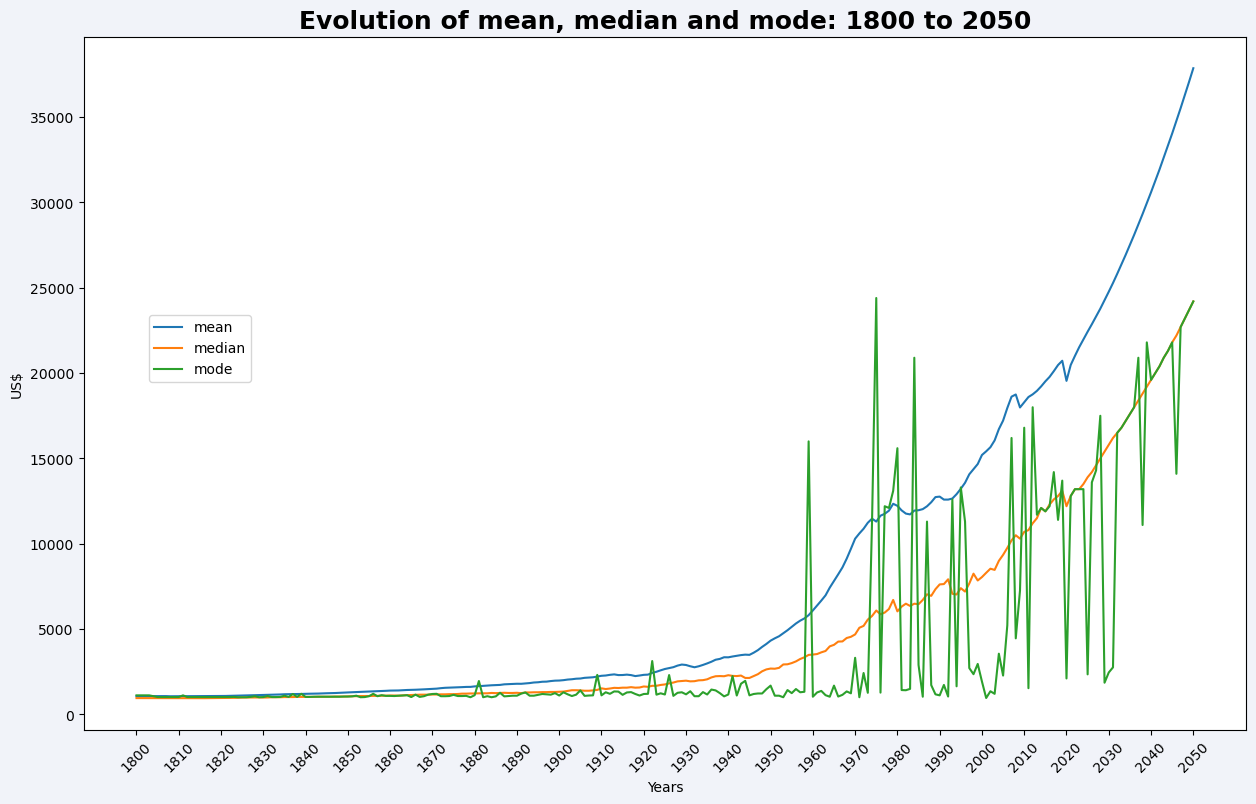

In [34]:
moyenne = data_modified.copy()
moyenne.set_index("country", inplace=True)
moyenne = moyenne.apply(lambda x: x.mean(), axis=0)
moyenne = pd.DataFrame(moyenne, columns=["mean"])
moyenne = moyenne.rename_axis("annee").reset_index()

median = data_modified.copy()
median.set_index("country", inplace=True)
median = median.apply(lambda x: x.median(), axis=0)
median = pd.DataFrame(median, columns=["median"])
median = median.rename_axis("annee").reset_index()

modes = data_modified.copy()
modes.set_index("country", inplace=True)
modes = modes.apply(lambda x: x.mode()[0], axis=0)
modes = pd.DataFrame(modes, columns=["mode"])
modes = modes.rename_axis("annee").reset_index()

x_axis = [year for year in range(1800, 2051, 1)]

fig, ax = plt.subplots()

sns.lineplot(data=moyenne, x=x_axis, y='mean', label='mean', ax=ax)
sns.lineplot(data=median, x=x_axis, y='median', label='median', ax=ax)
sns.lineplot(data=modes, x=x_axis, y='mode', label='mode', ax=ax)

ax.legend(loc="center",
          bbox_to_anchor=(0.1, 0.3, 0, 0.5))
plt.xticks(x_axis, rotation=45)
ax.set(xlabel='Years', ylabel='US$')
ax.xaxis.set_ticks(np.arange(1800, 2051, 10))
plt.title("Evolution of mean, median and mode: 1800 to 2050", fontsize=18, fontweight="bold")
#save_fig("bar_chart_Prudction_par_filieere_annee_2018")
plt.show()

####    5. Basé sur ce que vous avez lu dans les ressources : 
    - A votre avis, quand est-ce que la moyenne et la médiane sont proches ?
    - Que pouvez-vous en déduire sur la "forme de la distribution" des revenus (symétrie) ?

## Visualisation : Histogrammes 

### Théorie 

Un histogramme est une représentation graphique permettant de représenter la répartition empirique d'une variable aléatoire en la représentant avec des colonnes correspondant chacune à une classe. 

Les histogrammes sont un moyen rapide et visuel d'étudier la répartition d’une variable. Ils donnent un sens approximatif de la forme de la **densité de probabilité** sous jacente. 

**Attention** cependant, il existe de nombreuses manières de représenter les histogrammes, ils vous donneront une vision différente de la forme de la distribution. 

**Ressource :** 
- https://chartio.com/learn/charts/histogram-complete-guide/


### Exercice d'application théorique 

Tracer **à la main** un histogramme pour les données suivantes : 

    data = [ 12, 4, 21, 6, 2, 2, 5, 9, 0, 4, 7, 13, 20, 15, 6, 0, 8, 23, 4 ] 
    
Tracer l'histogramme en utilisant deux tailles d'intervalles différents : 

    Premier intervalle :  5
    
    Second intervalle : 10 


### Exercice d'application pratique 

&#x1F4A5; **To Do :** 

    1. Représenter pour chaque dataframe un histogramme pour les années 1805, 1900, 1945 et 2022.

    2. Représentez ces histogrammes de plusieurs manières différentes (nombre et positions des bins)

    3. Analysez les résultats : 
        - Que pouvez-vous dire de ces distributions ? 
        - Sont-elles symétriques ? 
        - Que pouvez-vous dire de l'évolution de la "queue des distributions" ? 

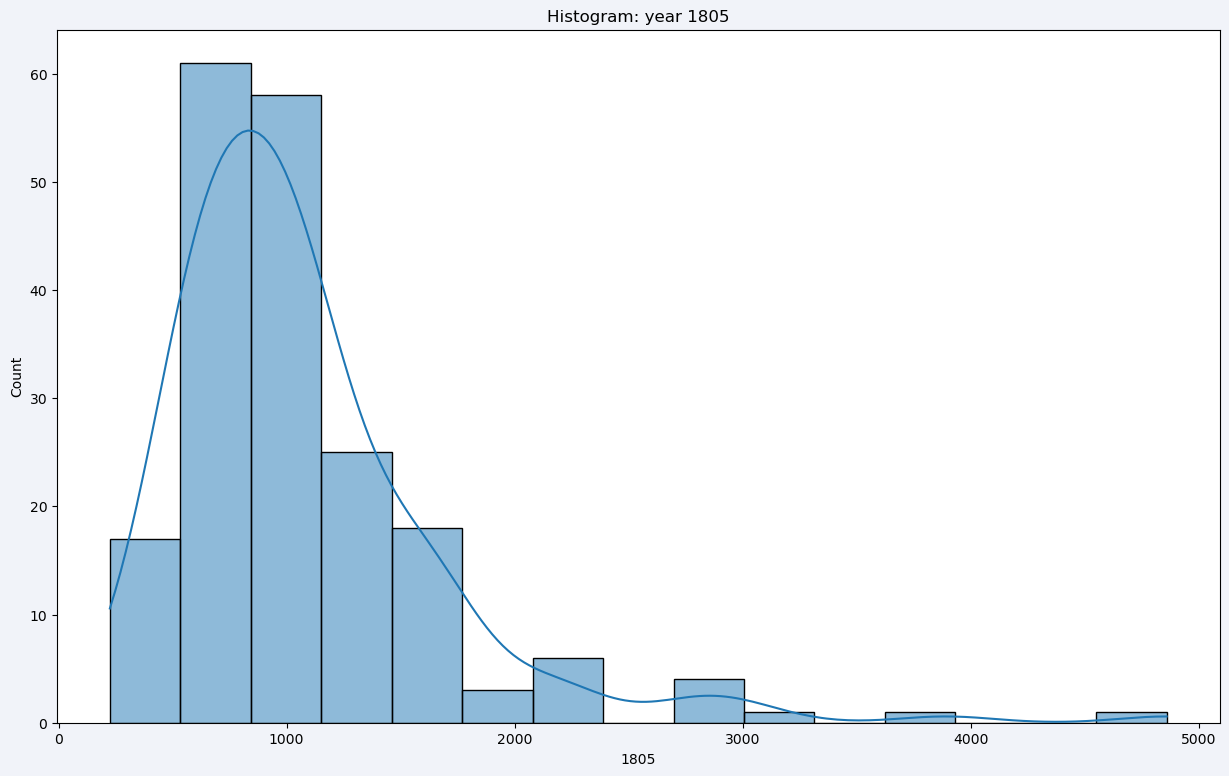

In [35]:
fig, ax = plt.subplots()

sns.histplot(data=data_modified, x="1805", bins=15, kde=True, ax=ax)

plt.title("Histogram: year 1805")
plt.show()

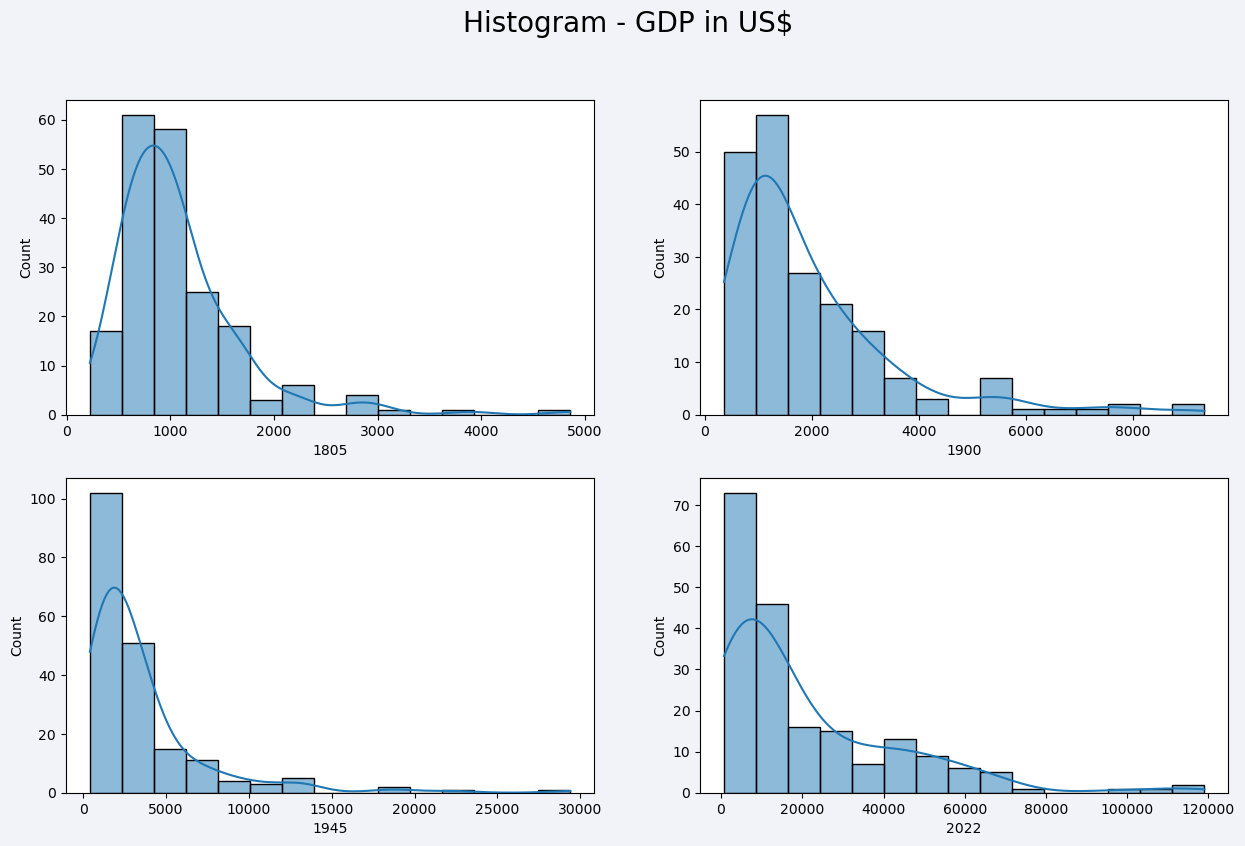

In [36]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.histplot(data=data_modified, x="1805", bins=15, kde=True, ax=ax1)
sns.histplot(data=data_modified, x="1900", bins=15, kde=True, ax=ax2)
sns.histplot(data=data_modified, x="1945", bins=15, kde=True, ax=ax3)
sns.histplot(data=data_modified, x="2022", bins=15, kde=True, ax=ax4)

fig.suptitle("Histogram - GDP in US$", fontsize=20)
plt.show()

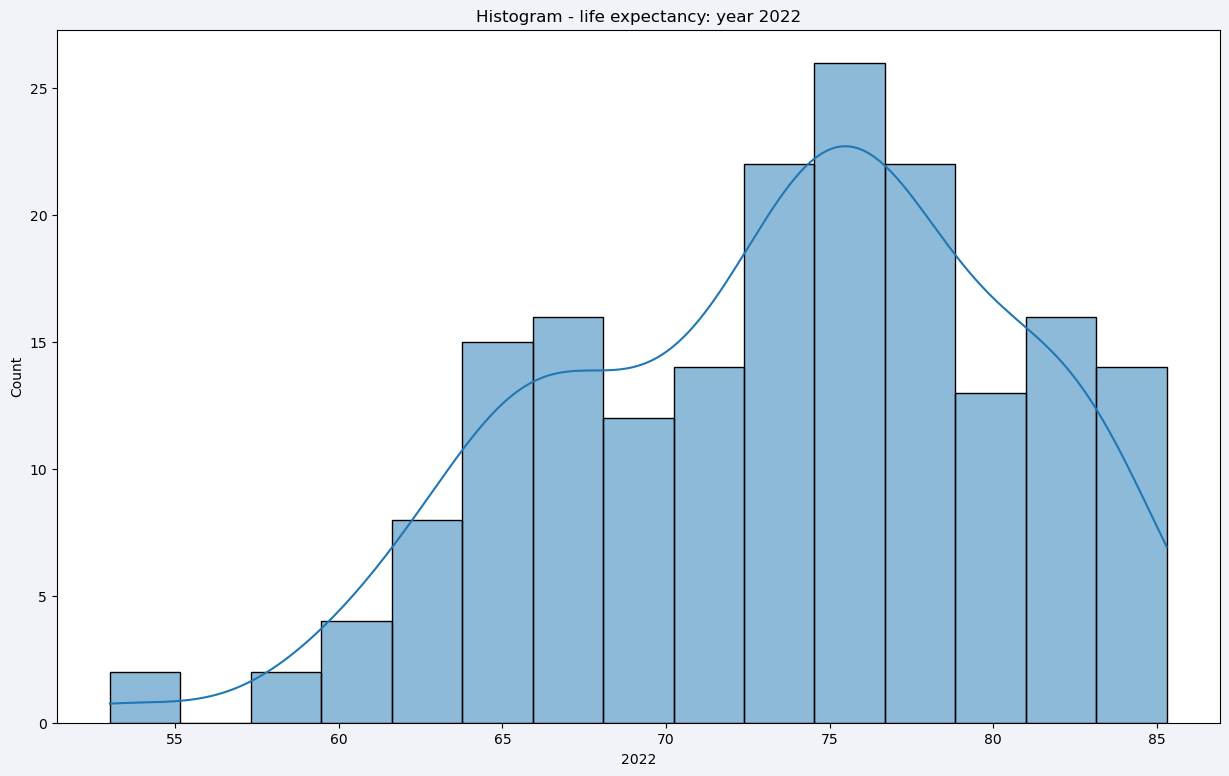

In [37]:
fig, ax = plt.subplots()

sns.histplot(data=life_data, x="2022", bins=15, kde=True, ax=ax)

plt.title("Histogram - life expectancy: year 2022")
plt.show()

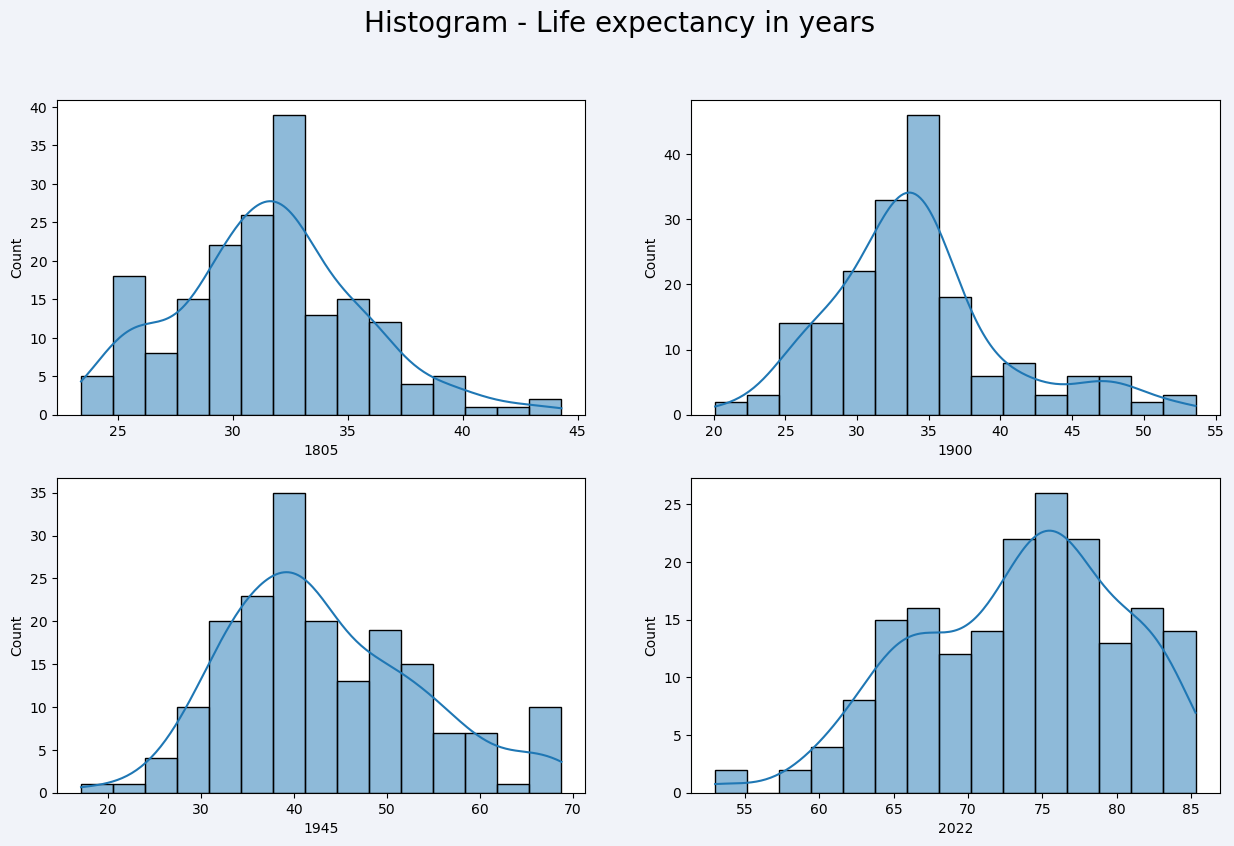

In [38]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.histplot(data=life_data, x="1805", bins=15, kde=True, ax=ax1)
sns.histplot(data=life_data, x="1900", bins=15, kde=True, ax=ax2)
sns.histplot(data=life_data, x="1945", bins=15, kde=True, ax=ax3)
sns.histplot(data=life_data, x="2022", bins=15, kde=True, ax=ax4)

fig.suptitle("Histogram - Life expectancy in years", fontsize=20)
plt.show()

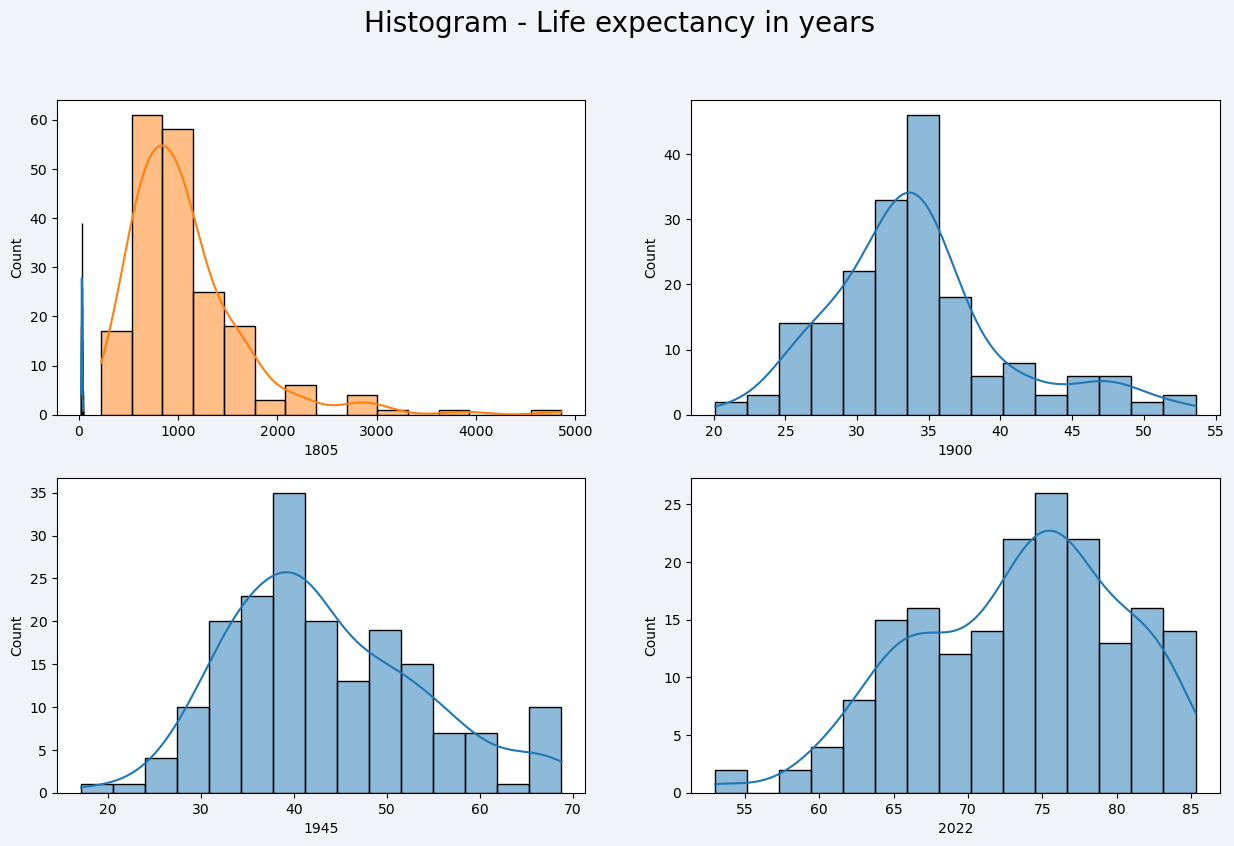

In [39]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.histplot(data=life_data, x="1805", bins=15, kde=True, ax=ax1)
sns.histplot(data=data_modified, x="1805", bins=15, kde=True, ax=ax1)
sns.histplot(data=life_data, x="1900", bins=15, kde=True, ax=ax2)
sns.histplot(data=life_data, x="1945", bins=15, kde=True, ax=ax3)
sns.histplot(data=life_data, x="2022", bins=15, kde=True, ax=ax4)

fig.suptitle("Histogram - Life expectancy in years", fontsize=20)
plt.show()

## Visualisation : BoxPlot

### Théorie 

**<font size="4"> Quantiles (centiles, quartiles, ...) </font>**

Les **quantiles** sont des valeurs qui partagent une distribution statistique en effectifs égaux. En d'autres termes, les qauntiles sont des sous-divisions des distributions de probabilités de la variable aléatoire en intervalles de tailles égales. 

Les quantiles prennent plusieurs noms en fonction du nombre de divisions choisi : 

- Les **centiles** sont le résultat de la division en 100 parties égales de l'intervalle entre le min et le max de la variable aléatoire. 

- Les **quartiles** sont le résultat de la division en 4 parties égales de l'intervalle entre le min et le max de la variable aléatoire. 

- Les **déciles** sont le résultat de la division en 10 parties égales... 


Quelques exemples de quantiles pour mieux comprendre : 

- La **médiane** est le 50ème percentile : il y a autant de valeurs supérieur que de valeurs inférieurs à la médiane. 

- Le **5e centile** est la valeur qui partage l'échantillon en 5% des données sous lui, et les 95% restant au-dessus de lui.

- Le **1er quartile (ou 25ème centile)** partage l'échantillon en 25% des données sous lui, et les 75% restant au-dessus de lui.

---

**<font size="4"> Cas des Box Plots </font>**

Les box plots (encore appelées (boîtes à moustaches!) sont une manière visualisement efficace de représenter plusieurs distributions en quelques indicateurs clés dont la **médiane** et les **quartiles**. 

Il est constitué de cette manière : 

<img width=500 src='https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png'>

La médiane, ainsi que le 1er et 3ème quartile sont calculés et représentés. 

Cela nous permet alors de considérer - par exemple - que toute valeur supérieure à `Q3 + 1.5 * IQR` (ou inférieure à `Q1 - 1.5 * IQR`) est un outlier.     


### Exercice d'application théorique 

Calculer **à la main** le Box Plot associé aux données suivantes :  

    data = [ 41, 6, 43, 47, 15, 49, 36, 7, 39, 41, 43 ] 
    
N'oubliez pas de trier les données pour pouvoir calculer le 1er quartile (Q1), la médiane, ainsi que le 3ème quartile (Q3). 

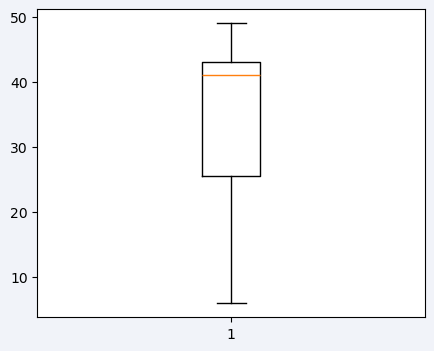

In [40]:
data = [ 41, 6, 43, 47, 15, 49, 36, 7, 39, 41, 43 ]

fig = plt.figure(figsize=(5,4))

ax = fig.add_subplot()

plt.boxplot(data)

plt.show()

In [41]:
np.percentile(data, 50)

41.0

In [42]:
np.percentile(data, 25)

25.5

In [43]:
np.percentile(data, 75)

43.0

### Mise en pratique

&#x1F4A5; **To Do :**
        
    1. Tracer une boîte à moustache pour les années 1805, 1900, 1945, 1960, 2000 et 2020. 

    2. Quelles distributions semblent similaires ?

    3. Comparer ces boxplots avec les histogrammes obtenus plus haut

<br/>

**Ressource :** <br/>
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html

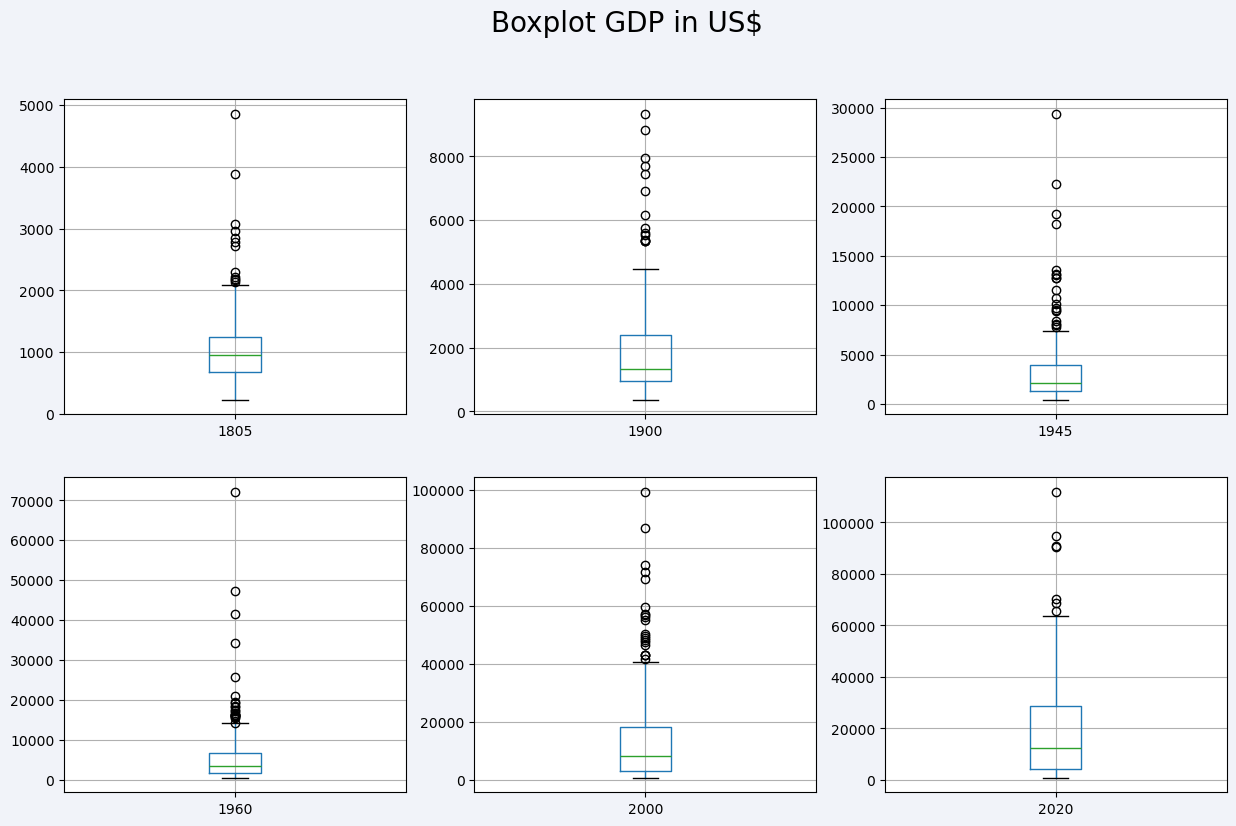

In [44]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

data_modified.boxplot(column=["1805"], ax=ax1)
data_modified.boxplot(column=["1900"], ax=ax2)
data_modified.boxplot(column=["1945"], ax=ax3)
data_modified.boxplot(column=["1960"], ax=ax4)
data_modified.boxplot(column=["2000"], ax=ax5)
data_modified.boxplot(column=["2020"], ax=ax6)

fig.suptitle("Boxplot GDP in US$", fontsize=20)

plt.show()

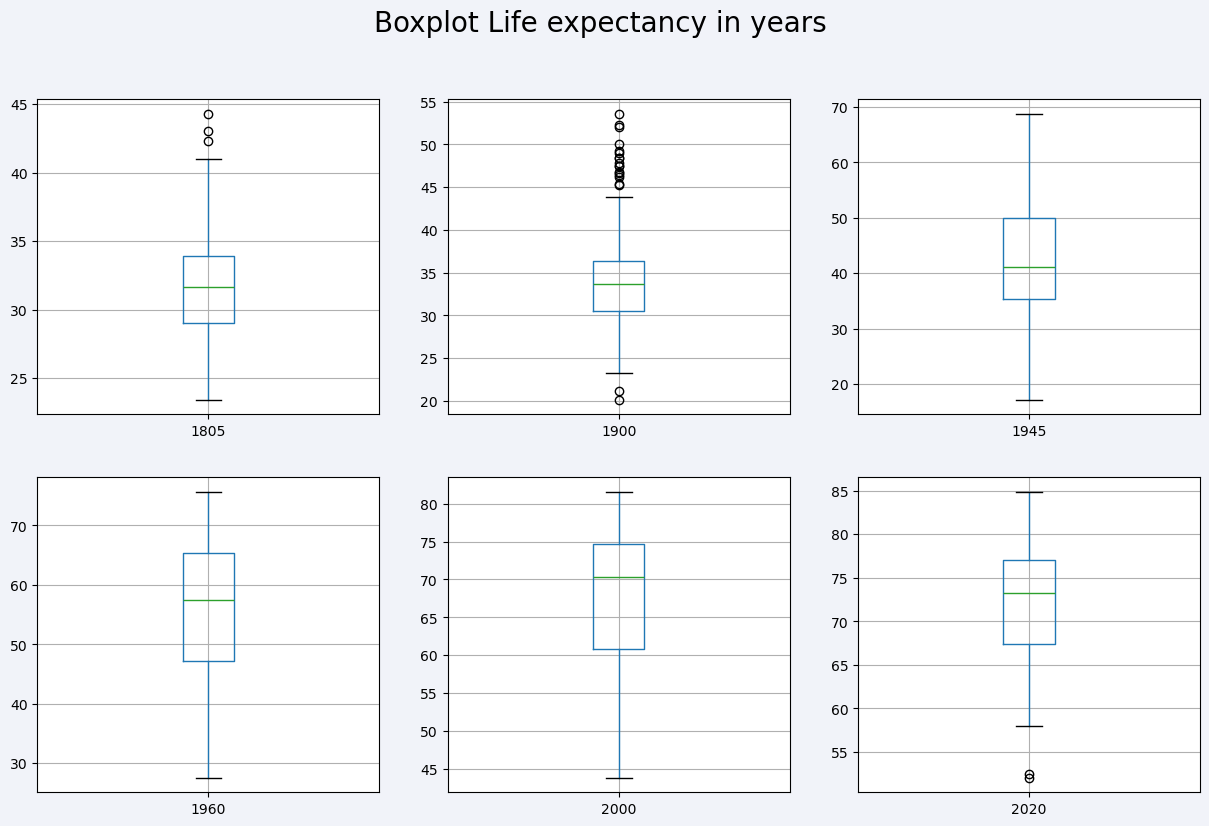

In [45]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

life_data.boxplot(column=["1805"], ax=ax1)
life_data.boxplot(column=["1900"], ax=ax2)
life_data.boxplot(column=["1945"], ax=ax3)
life_data.boxplot(column=["1960"], ax=ax4)
life_data.boxplot(column=["2000"], ax=ax5)
life_data.boxplot(column=["2020"], ax=ax6)

fig.suptitle("Boxplot Life expectancy in years", fontsize=20)

plt.show()

## Mesures de dispersion

### Théorie

Il existe plusieurs mesures de variabilité populaires. Ces mesures sont utilisées pour mesurer l'étendue / variabilité / dispersion de vos données.

1. **Intervalle maximum :** la plage où se trouvent le début et la fin de votre échantillon de données (maximum - minimum)


2. **Intervalle interquartile (IQR) :** mesure de l'intervalle entre le 1er et 3ème quartiles. Cela permet de savoir où se situe 50% des valeurs


3. **Variance :** 
     - Mesure de l'écart moyen entre un point et la moyenne. 
     - La variance est calculée en calculant la distance au carré entre chaque point de donnée et la moyenne. On prend la moyenne de tous ces nombres.
     - La "mise au carré" est utilisée pour pondérer plus lourdement les valeurs aberrantes et empêcher que les différences au-dessus de la moyenne neutralisent celles en dessous de la moyenne.
     - En raison de la mise au carré, ce n'est pas dans la même unité de mesure que les données d'origine


4. **Ecart-type (standard deviation)** : racine carrée de la variance. On retrouve donc l'unité d'origine. C'est la grandeur la plus utilisée. 
 
<br/>

**Ressources :**
- https://fr.wikipedia.org/wiki/%C3%89cart_type
- https://www.techno-science.net/definition/5953.html

<br/>

--- 

<br/>


**Deux illustrations :**


Exemple de deux échantillons ayant la même moyenne mais des écarts types différents illustrant l'écart type comme mesure de la dispersion autour de la moyenne : 

<img width="350" src= 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Comparison_standard_deviations.svg/500px-Comparison_standard_deviations.svg.png'>


--- 


Courbe de **distribution normale** montrant l'écart type. Chaque bande verticale a une largeur d'un écart type et les pourcentages indiquent leur valeur approximative rapportée à la population totale. Note : du fait des arrondis, le total est de 99,8 % au lieu de 100%.

<img width="350" src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/500px-Standard_deviation_diagram.svg.png'>

### Exercice d'application théorique 

Calculer **à la main** les 4 grandeurs présentées dans la partie théorique pour les données suivantes :  

`data = [ 41, 6, 43, 47, 15, 49, 36, 7, 39, 41, 43 ]`


In [46]:
data = [ 41, 6, 43, 47, 15, 49, 36, 7, 39, 41, 43 ]

st.variance(data)

255.25454545454545

In [47]:
m = st.mean(data)

((6-m)**2+(7-m)**2+(15-m)**2+(39-m)**2+2*(41-m)**2+2*(43-m)**2+(47-m)**2+(49-m)**2)/10

254.5595041322314

### Mise en pratique

&#x1F4A5; **To Do :**
        
    1. Calculer et afficher l'étendue maximale (intervalle maximal) des données au cours du temps. 
    
    2. Calculer et afficher l'écart type au cours du temps pour les deux dataframes. Que pouvez-vous tirer comme conclusion ? 

    3. Vos calculs d'écart-type sont-ils en accord avec les histogrammes et box plosts que vous avez tracés précédemment ? 
    
    4. Faîtes un joli graphique représentant la moyenne des données au cours du temps, entourée d'une bande semi-transparente de largeur égale à deux écart-types (2 sigma)   

<img width=400 src="https://i.stack.imgur.com/1dBtB.png">


**Ressources :** <br/>

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
- https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.fill_between.html

### 1. Calculer et afficher l'étendue maximale (intervalle maximal) des données au cours du temps. 

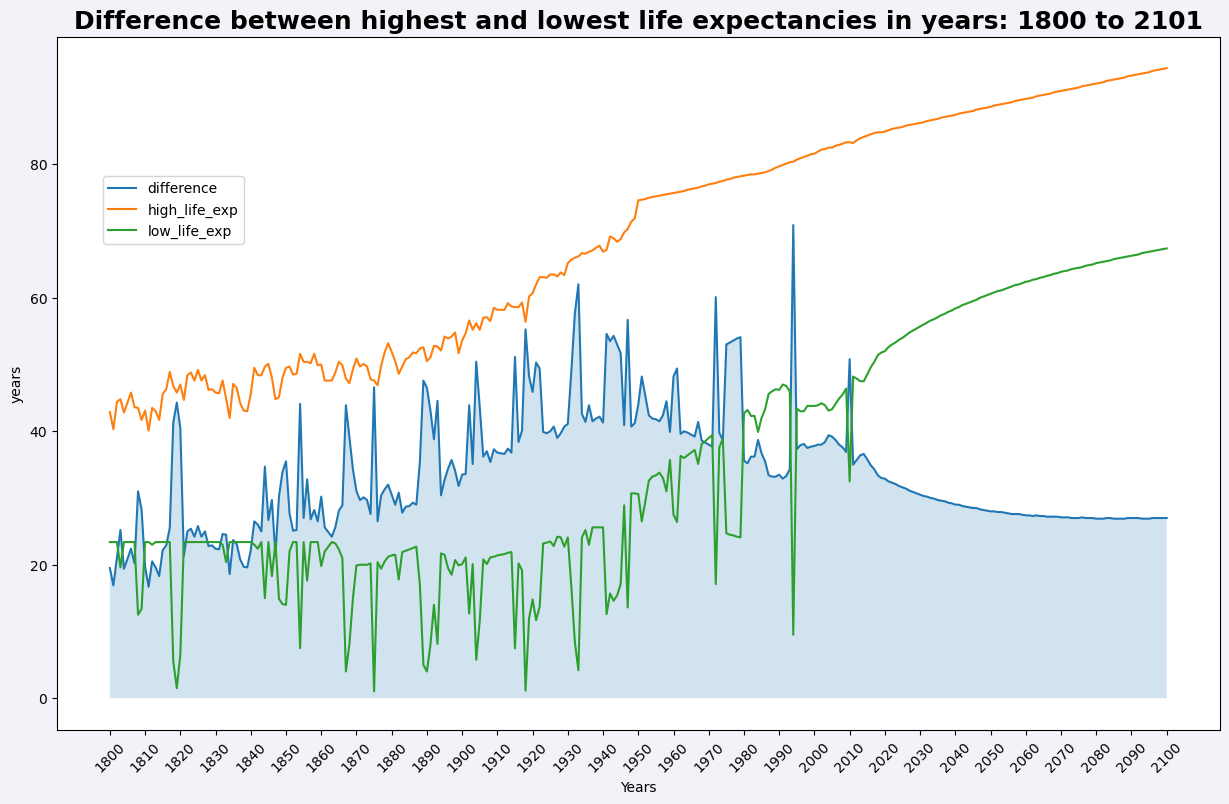

In [48]:
diff_life = life_data.copy()
diff_life.set_index("country", inplace=True)
diff_life = diff_life.apply(lambda x: x.max(), axis=0) - diff_life.apply(lambda x: x.min(), axis=0)

diff_life = pd.DataFrame(diff_life, columns=["diff"])
diff_life = diff_life.rename_axis("annee").reset_index()

high_life_exp = life_data.copy()
high_life_exp.set_index("country", inplace=True)
high_life_exp = high_life_exp.apply(lambda x: x.max(), axis=0)

high_life_exp = pd.DataFrame(high_life_exp, columns=["max"])
high_life_exp = high_life_exp.rename_axis("annee").reset_index()

low_life_exp = life_data.copy()
low_life_exp.set_index("country", inplace=True)
low_life_exp = low_life_exp.apply(lambda x: x.min(), axis=0)

low_life_exp = pd.DataFrame(low_life_exp, columns=["min"])
low_life_exp = low_life_exp.rename_axis("annee").reset_index()

x_axis = [year for year in range(1800, 2101, 1)]

fig, ax = plt.subplots()

sns.lineplot(data=diff_life, x=x_axis, y="diff",
             ax=ax, label="difference", )
sns.lineplot(data=high_life_exp, x=x_axis, y="max",
             ax=ax, label="high_life_exp")
sns.lineplot(data=low_life_exp, x=x_axis, y="min",
             ax=ax, label="low_life_exp")

ax.legend(loc="center",
          bbox_to_anchor=(0.1, 0.5, 0, 0.5))
plt.xticks(x_axis, rotation=45)
ax.set(xlabel='Years', ylabel='years')
ax.xaxis.set_ticks(np.arange(1800, 2101, 10))
ax.xaxis.set_ticks(np.arange(1800, 2101, 10))
plt.fill_between(x_axis, diff_life["diff"], alpha=0.2)
plt.title("Difference between highest and lowest life expectancies in years: 1800 to 2101", fontsize=18, fontweight="bold")
#save_fig("bar_chart_Prudction_par_filieere_annee_2018")
plt.show()

### 2. Calculer et afficher l'écart type au cours du temps pour les deux dataframes. Que pouvez-vous tirer comme conclusion ?

In [49]:
data_modified.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,1072.179487,1071.353846,1074.210256,1073.753846,1075.430769,1075.174359,1076.169231,1076.251282,1066.497436,1067.553846,...,31265.887179,31926.969231,32628.666667,33321.482051,34038.717949,34775.692308,35524.302564,36288.200000,37069.538462,37862.666667
std,605.373041,602.816015,614.245612,608.330435,617.123397,610.442792,612.281097,606.053716,564.608763,569.926448,...,32907.181429,33561.829538,34317.547783,35048.003672,35799.737313,36575.963727,37360.004955,38162.971505,38986.791899,39818.346586
min,224.000000,224.000000,224.000000,224.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,...,1050.000000,1070.000000,1100.000000,1120.000000,1140.000000,1170.000000,1190.000000,1220.000000,1240.000000,1270.000000
25%,680.500000,680.500000,680.500000,680.500000,680.500000,680.500000,680.500000,680.500000,680.500000,680.500000,...,6550.000000,6690.000000,6840.000000,6985.000000,7135.000000,7290.000000,7445.000000,7610.000000,7770.000000,7935.000000
50%,959.000000,959.000000,959.000000,959.000000,954.000000,954.000000,956.000000,960.000000,960.000000,960.000000,...,20000.000000,20400.000000,20900.000000,21300.000000,21800.000000,22200.000000,22700.000000,23200.000000,23700.000000,24200.000000
75%,1240.000000,1240.000000,1240.000000,1245.000000,1250.000000,1250.000000,1255.000000,1255.000000,1255.000000,1255.000000,...,49150.000000,50250.000000,51300.000000,52400.000000,53550.000000,54750.000000,55900.000000,57100.000000,58350.000000,59550.000000
max,4860.000000,4780.000000,5040.000000,4930.000000,5170.000000,4860.000000,4900.000000,4490.000000,3780.000000,3850.000000,...,173000.000000,176000.000000,180000.000000,184000.000000,188000.000000,192000.000000,196000.000000,200000.000000,205000.000000,209000.000000


In [50]:
data_modified["1800"].std()

605.3730413263247

#### just to check:

In [51]:
from math import sqrt

s = 0

mean = data_modified["1800"].sum() / len(data_modified["1800"])

for _, row in data_modified["1800"].items():

    s += (row - mean)**2

st_d = sqrt((1/(len(data_modified) - 1)) * s)
st_d

605.3730413263246

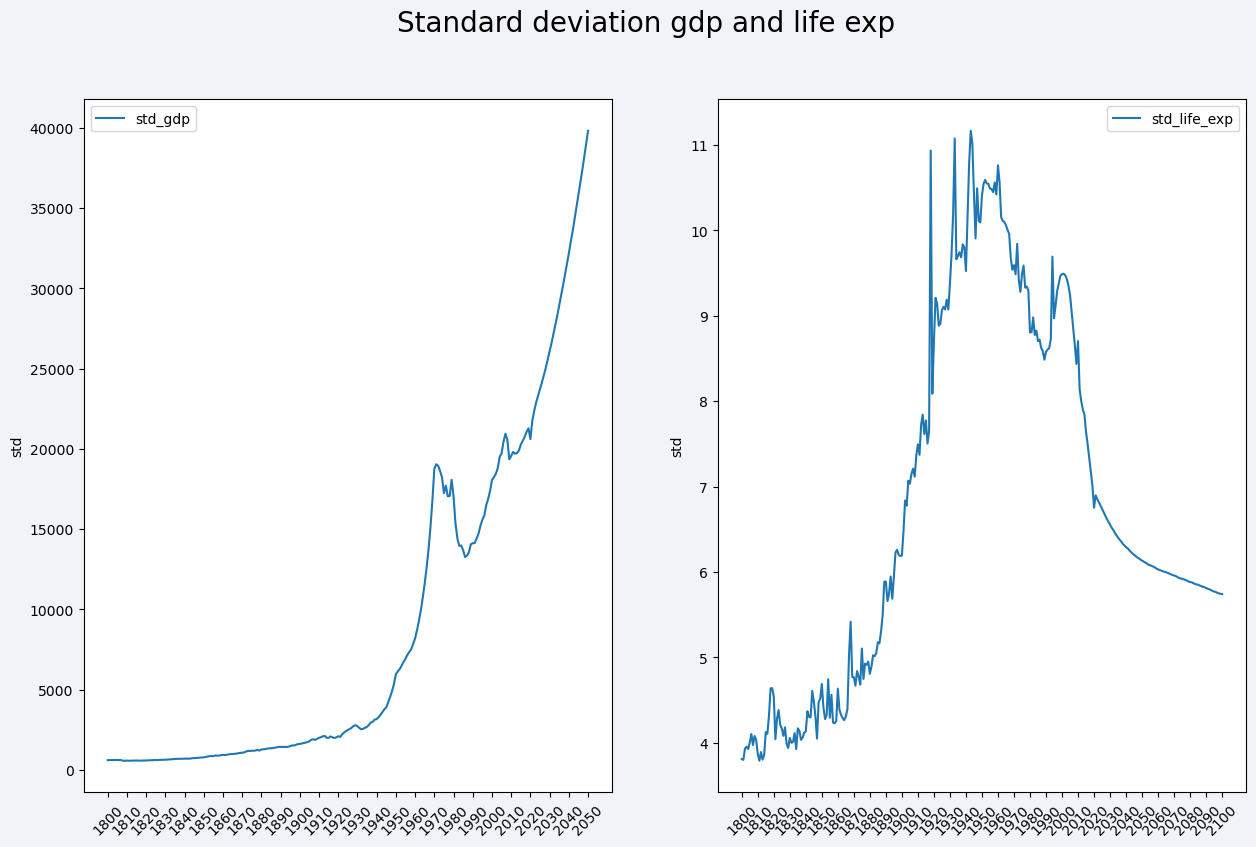

In [52]:
std_gdp = data_modified.copy()
std_gdp.set_index("country", inplace=True)
std_gdp = std_gdp.apply(lambda x: x.std(), axis=0)
std_gdp = pd.DataFrame(std_gdp, columns=["std"])
std_gdp = std_gdp.rename_axis("annee").reset_index()

std_life_exp = life_data.copy()
std_life_exp.set_index("country", inplace=True)
std_life_exp = std_life_exp.apply(lambda x: x.std(), axis=0)
std_life_exp = pd.DataFrame(std_life_exp, columns=["std"])
std_life_exp = std_life_exp.rename_axis("annee").reset_index()


x_axis_gdp = [year for year in range(1800, 2051, 1)]
x_axis_lif = [year for year in range(1800, 2101, 1)]

fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.lineplot(data=std_gdp, x=x_axis_gdp, y='std', label='std_gdp', ax=ax1)
sns.lineplot(data=std_life_exp, x=x_axis_lif, y='std', label='std_life_exp', ax=ax2)

ax.legend(loc="center",
          bbox_to_anchor=(0.1, 0.3, 0, 0.5))
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)
ax.set(xlabel='Years', ylabel='US$')
ax1.xaxis.set_ticks(np.arange(1800, 2051, 10))
ax2.xaxis.set_ticks(np.arange(1800, 2101, 10))
fig.suptitle("Standard deviation gdp and life exp", fontsize=20)
#save_fig("bar_chart_Prudction_par_filieere_annee_2018")
plt.show()

### 4. Faîtes un joli graphique représentant la moyenne des données au cours du temps, entourée d'une bande semi-transparente de largeur égale à deux écart-types (2 sigma) 

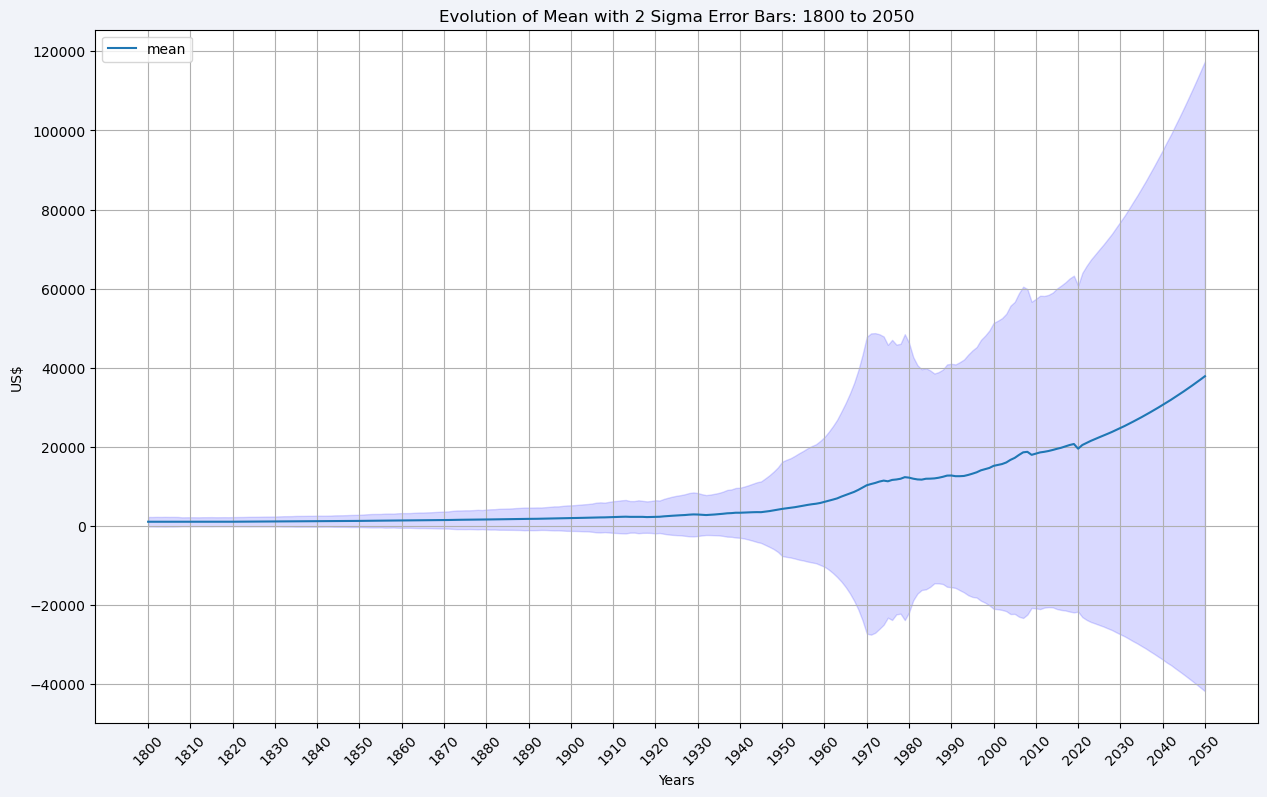

In [53]:
df_mean_std = data_modified.copy()
df_mean_std.set_index("country", inplace=True)

moyenne_df = df_mean_std.apply(lambda x: x.mean(), axis=0)
std_df = df_mean_std.apply(lambda x: x.std(), axis=0)

years = moyenne_df.index

df_for_plot = pd.DataFrame({
    "year": years,
    "mean": moyenne_df.values,
    "std_dev": std_df.values
})

x_axis = [year for year in range(1800, 2051, 1)]

fig, ax = plt.subplots()

sns.lineplot(data=df_for_plot, x=x_axis, y="mean", ax=ax, label="mean")

ax.fill_between(x_axis,
                df_for_plot["mean"] - 2 * df_for_plot["std_dev"],
                df_for_plot["mean"] + 2 * df_for_plot["std_dev"],
                color="blue",
                alpha=0.15)

ax.legend(loc="upper left")
ax.set_xlabel("Years")
ax.set_ylabel("US$")
ax.set_title("Evolution of Mean with 2 Sigma Error Bars: 1800 to 2050")
plt.xticks(np.arange(1800, 2051, 10), rotation=45)
plt.grid(True)

plt.show()

## Mesures de dispersion avancée

### Théorie

Il existe d'autres mesures de description de la forme d'une distribution. 

Deux exemples classiques sont la mesure de skewness et de kurtosis :

    - Skewness : mesure le manque de symétrie de la distribution
    - Kurtosis : mesure l'aplatissement comparé à une distribution normale (gaussienne)

**Ressources :**
- https://towardsdatascience.com/intro-to-descriptive-statistics-252e9c464ac9 
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html
- https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm

### Exercice d'application théorique 

Calculer à la main la skewness et le kurtosis pour les données suivantes :

`data = [ 10, 8, 12, 14, 6, 17, 11, 9, 21, 2, 88, 56, 10, 11, 9, 15 ]`


### Mise en pratique

&#x1F4A5; **To Do :**
        
    1. Calculer et afficher la skewness et le kurtosis pour chacun de vos dataframes au cours du temps. 
    
    2. Ces mesures sont-elles en accord avec ce que vous attendiez ? Signe de la skewness par exemple ? Evolution du Kurtosis au cours du temps ?  
    
    3. Que pouvez-vous en conclure sur les inégalités de revenus et d'espérance de vie dans le monde ? 

### 1. Calculer et afficher la skewness et le kurtosis pour chacun de vos dataframes au cours du temps.

In [54]:
skew = data_modified.copy()
skew.set_index("country", inplace=True)
skew = skew.apply(lambda x: x.skew(), axis=0)
skew = pd.DataFrame(skew, columns=["skewness"])
skew = skew.rename_axis("annee").reset_index()
skew

,annee,skewness
0,1800,2.513917
1,1801,2.481205
2,1802,2.631918
3,1803,2.534678
4,1804,2.676705
...,...,...
246,2046,1.837060
247,2047,1.836914
248,2048,1.835137
249,2049,1.836865


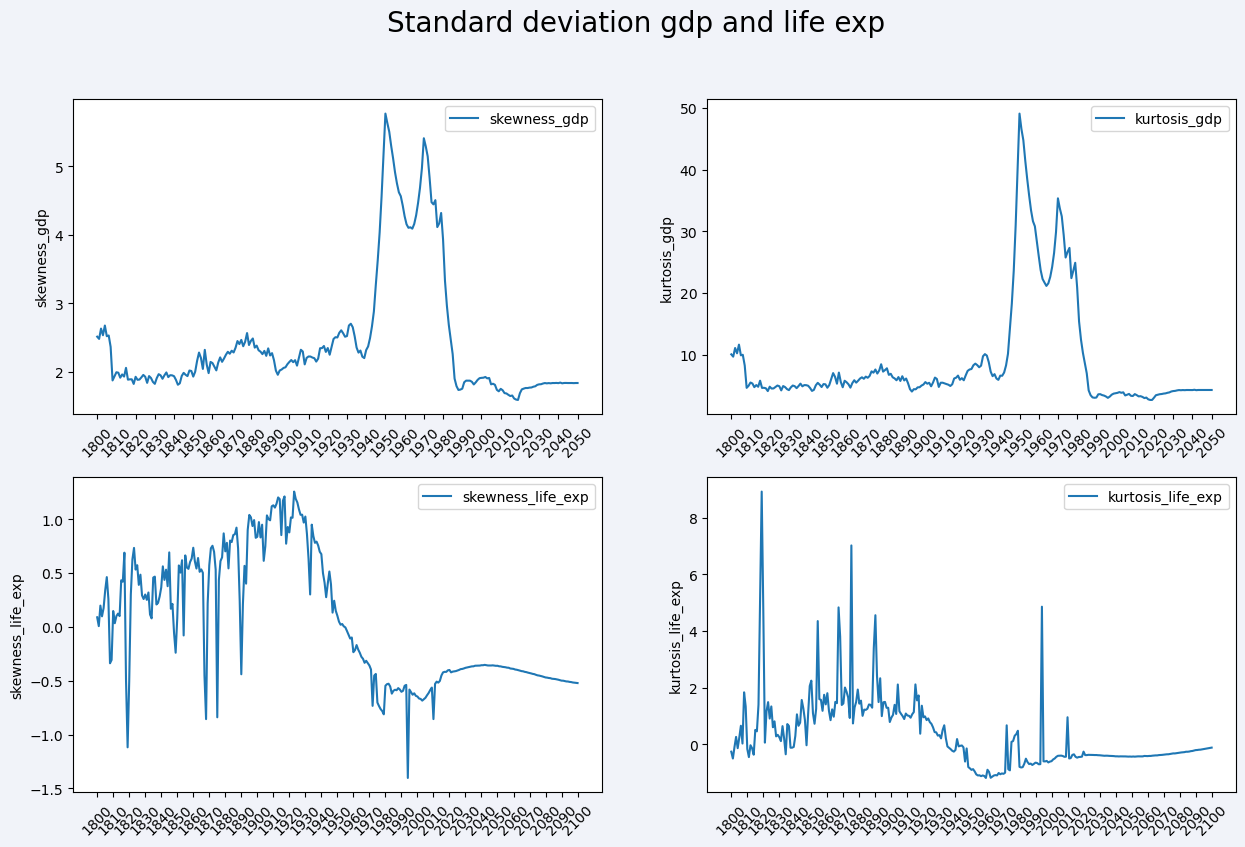

In [55]:
skew_gdp = data_modified.copy()
skew_gdp.set_index("country", inplace=True)
skew_gdp = skew_gdp.apply(lambda x: x.skew(), axis=0)
skew_gdp = pd.DataFrame(skew_gdp, columns=["skewness_gdp"])
skew_gdp = skew_gdp.rename_axis("annee").reset_index()

kurto_gdp = data_modified.copy()
kurto_gdp.set_index("country", inplace=True)
kurto_gdp = kurto_gdp.apply(lambda x: x.kurt(), axis=0)
kurto_gdp = pd.DataFrame(kurto_gdp, columns=["kurtosis_gdp"])
kurto_gdp = kurto_gdp.rename_axis("annee").reset_index()

skew_life_exp = life_data.copy()
skew_life_exp.set_index("country", inplace=True)
skew_life_exp = skew_life_exp.apply(lambda x: x.skew(), axis=0)
skew_life_exp = pd.DataFrame(skew_life_exp, columns=["skewness_life_exp"])
skew_life_exp = skew_life_exp.rename_axis("annee").reset_index()

kurto_life_exp = life_data.copy()
kurto_life_exp.set_index("country", inplace=True)
kurto_life_exp = kurto_life_exp.apply(lambda x: x.kurt(), axis=0)
kurto_life_exp = pd.DataFrame(kurto_life_exp, columns=["kurtosis_life_exp"])
kurto_life_exp = kurto_life_exp.rename_axis("annee").reset_index()

x_axis_gdp = [year for year in range(1800, 2051, 1)]
x_axis_lif = [year for year in range(1800, 2101, 1)]

fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.lineplot(data=skew_gdp, x=x_axis_gdp, y='skewness_gdp', label='skewness_gdp', ax=ax1)
sns.lineplot(data=kurto_gdp, x=x_axis_gdp, y='kurtosis_gdp', label='kurtosis_gdp', ax=ax2)
sns.lineplot(data=skew_life_exp, x=x_axis_lif, y='skewness_life_exp', label='skewness_life_exp', ax=ax3)
sns.lineplot(data=kurto_life_exp, x=x_axis_lif, y='kurtosis_life_exp', label='kurtosis_life_exp', ax=ax4)

ax.legend(loc="center",
          bbox_to_anchor=(0.1, 0.3, 0, 0.5))

ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='x', rotation=45)
ax4.tick_params(axis='x', rotation=45)

ax1.xaxis.set_ticks(np.arange(1800, 2051, 10))
ax2.xaxis.set_ticks(np.arange(1800, 2051, 10))
ax3.xaxis.set_ticks(np.arange(1800, 2101, 10))
ax4.xaxis.set_ticks(np.arange(1800, 2101, 10))

fig.suptitle("Standard deviation gdp and life exp", fontsize=20)
#save_fig("bar_chart_Prudction_par_filieere_annee_2018")
plt.show()

# Statistiques multivariées

On va maintenant observer les données en croisant les variables entre elles. 

Les statistiques multivariées s'intéressent aux lois de probabilité de plusieurs variables. Dans notre cas nous allons réaliser une analyse bivariée - c'est à dire l'étude conjointe de deux variables. 

Il existe - à la louche - deux grandes familles d'analyses multivariées : 

    - L'analyse « descriptive » : résumer et structurer l'information grâce à quelques grandeurs bien choisies.    
    
    - L'analyse « explicative » : expliquer certaines variables dont les variations sont issues d'autre grandeurs dites indépendantes. 
    
Ici nous ne nous intéresserons pour le moment qu'aux méthodes descriptives. 


## Normalisation / standardisation

### Théorie

Vous avez peut-être constaté dans les questions précédentes qu'il est difficile de comparer les variables entre elles car elles ne sont pas sur les mêmes plages de valeurs. 


Afin de faciliter l'analyse de "liens" ou de "corrélation" ou encore "d'influence" entre les données nous allons d'abord devoir les normaliser : 

    - Cela nous permettra de comparer les grandeurs qui ont des unités ou des échelles différentes. 
 
    - Cela facilitera l'interprétation des coefficients de régression (vous verrez cela un peu plus tard) 
    
    - Cela aide à la convergence des algorithmes de machine learning 

<br>

Nous allons donc **normaliser** et **standardiser** les données : 

    - Normalisation : redimensionner les valeurs dans la plage [0,1]
    
$$X'= \frac{X-X_{\min }}{X_{\max }-X_{\min }}$$
    
    - Standardisation : redimensionne les données pour avoir une moyenne de 0 et un écart type de 1.     
$$X'= \frac{X - mean}{std}$$


**Ressources :** <br/>
- https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html<br/>
- https://towardsdatascience.com/normalization-vs-standardization-cb8fe15082eb<br/>

### Mise en pratique 

&#x1F4A5; **To Do :**
        
    1. Standardiser et normaliser les deux dataframes (par colonne)
    
    2. Identifier les outliers (typiquement > 3 std)
    
    3. Tracer les histogrammes obtenus sans outliers

### 1. Standardiser et normaliser les deux dataframes (par colonne)

In [56]:
norm_df = data_modified.set_index("country").dropna(axis=1)
norm_df = (norm_df - norm_df.min())  / (norm_df.max() - norm_df.min())
norm_df

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.099008,0.100746,0.095307,0.097535,0.092619,0.098813,0.097968,0.107386,0.128833,0.126345,...,0.009538,0.009604,0.009558,0.009569,0.009579,0.009537,0.009599,0.009558,0.009570,0.009580
Angola,0.102675,0.104917,0.099875,0.103060,0.098281,0.105502,0.105455,0.116295,0.140647,0.138483,...,0.040419,0.040588,0.040525,0.040518,0.040512,0.040507,0.040552,0.040547,0.040440,0.040533
Albania,0.114538,0.116550,0.110257,0.112835,0.107179,0.114563,0.113583,0.124502,0.149367,0.146483,...,0.139866,0.140228,0.140302,0.139873,0.139998,0.140072,0.140188,0.140256,0.139674,0.140230
Andorra,0.245039,0.249342,0.235880,0.241394,0.231547,0.247033,0.244920,0.268464,0.324895,0.318621,...,0.394591,0.396330,0.395752,0.395232,0.395269,0.395273,0.395822,0.396318,0.394876,0.395369
United Arab Emirates,0.195427,0.198859,0.190199,0.194645,0.187058,0.199569,0.200000,0.219226,0.263010,0.260690,...,0.581274,0.582690,0.580771,0.578959,0.582575,0.580779,0.579077,0.582453,0.577935,0.581187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,0.294651,0.299824,0.283638,0.290268,0.276036,0.294498,0.291979,0.320047,0.383966,0.376552,...,0.045420,0.045618,0.045556,0.045494,0.045542,0.045538,0.045737,0.045679,0.045446,0.045395
Yemen,0.165876,0.169227,0.160714,0.164896,0.156724,0.169364,0.167914,0.184056,0.223629,0.219310,...,0.015702,0.015778,0.015707,0.015693,0.015734,0.015721,0.015759,0.015746,0.015705,0.015742
South Africa,0.335634,0.337138,0.314784,0.317892,0.298281,0.298813,0.296257,0.357562,0.367089,0.348966,...,0.088107,0.088778,0.088317,0.088473,0.088622,0.088718,0.088856,0.088439,0.088634,0.088721


In [57]:
standard_df = data_modified.set_index("country").dropna(axis=1)
standard_df = (standard_df - standard_df.mean())  / (standard_df.std())
standard_df

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.642875,-0.644233,-0.636895,-0.642338,-0.635903,-0.642442,-0.642138,-0.648872,-0.679227,-0.674743,...,-0.868378,-0.869350,-0.868904,-0.868851,-0.868965,-0.869032,-0.868959,-0.869120,-0.869000,-0.869013
Angola,-0.614794,-0.612714,-0.601079,-0.599598,-0.590531,-0.591660,-0.584975,-0.586171,-0.604839,-0.597540,...,-0.707015,-0.707857,-0.707471,-0.707358,-0.707511,-0.707451,-0.707556,-0.707707,-0.707664,-0.707530
Albania,-0.523941,-0.524793,-0.519679,-0.523981,-0.519233,-0.522857,-0.522912,-0.528421,-0.549934,-0.546656,...,-0.187372,-0.188517,-0.187329,-0.188926,-0.188234,-0.187984,-0.188017,-0.188355,-0.189027,-0.187418
Andorra,0.475443,0.478830,0.465269,0.470544,0.477326,0.482970,0.479895,0.484691,0.555256,0.548222,...,1.143644,1.146333,1.144351,1.143532,1.144178,1.143492,1.144960,1.145398,1.144759,1.143627
United Arab Emirates,0.095512,0.097287,0.107107,0.108898,0.120834,0.122576,0.136915,0.138187,0.165606,0.179753,...,2.119115,2.117675,2.108873,2.102217,2.121839,2.111340,2.100527,2.114924,2.101493,2.113029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,0.855374,0.860372,0.839713,0.848628,0.833819,0.843364,0.839207,0.847695,0.927195,0.916690,...,-0.680881,-0.681637,-0.681245,-0.681394,-0.681254,-0.681204,-0.680522,-0.680979,-0.681501,-0.682165
Yemen,-0.130795,-0.126662,-0.124071,-0.121240,-0.122230,-0.106766,-0.108070,-0.109316,-0.082353,-0.083439,...,-0.836167,-0.837170,-0.836851,-0.836895,-0.836842,-0.836771,-0.836839,-0.836890,-0.836938,-0.836867
South Africa,1.169230,1.142382,1.083915,1.062328,1.012065,0.876127,0.871872,1.111698,0.820927,0.741229,...,-0.457830,-0.456679,-0.458327,-0.457130,-0.456392,-0.455919,-0.455683,-0.458250,-0.455784,-0.456138


check:

In [58]:
standard_df.mean()

1800    1.594166e-16
1801   -1.229786e-16
1802    1.730809e-16
1803    9.564998e-17
1804   -1.594166e-16
            ...     
2046    4.099285e-17
2047   -8.654046e-17
2048    6.376666e-17
2049    4.554761e-18
2050    5.465713e-17
Length: 251, dtype: float64

In [59]:
standard_df.std()

1800    1.0
1801    1.0
1802    1.0
1803    1.0
1804    1.0
       ... 
2046    1.0
2047    1.0
2048    1.0
2049    1.0
2050    1.0
Length: 251, dtype: float64

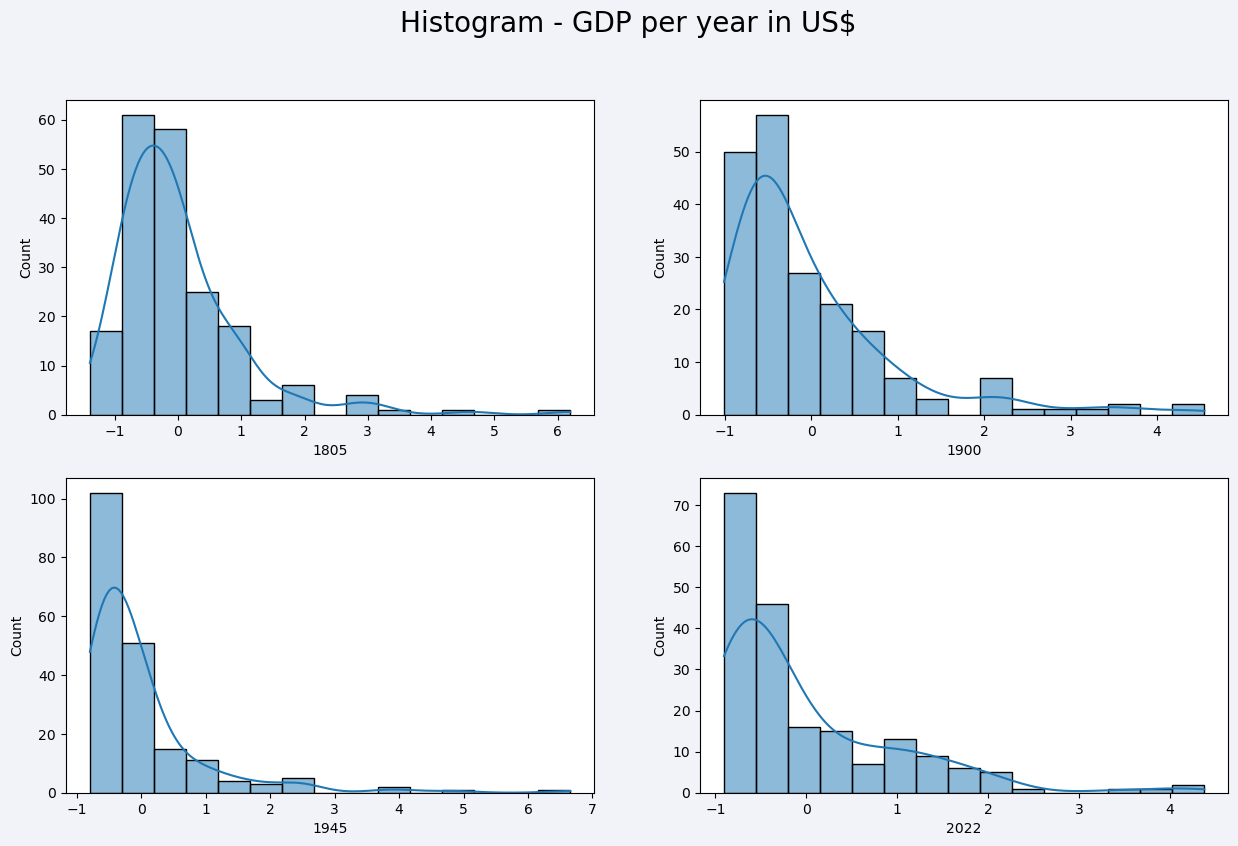

In [60]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.histplot(data=standard_df, x="1805", bins=15, kde=True, ax=ax1)
sns.histplot(data=standard_df, x="1900", bins=15, kde=True, ax=ax2)
sns.histplot(data=standard_df, x="1945", bins=15, kde=True, ax=ax3)
sns.histplot(data=standard_df, x="2022", bins=15, kde=True, ax=ax4)

fig.suptitle("Histogram - GDP per year in US$", fontsize=20)
plt.show()

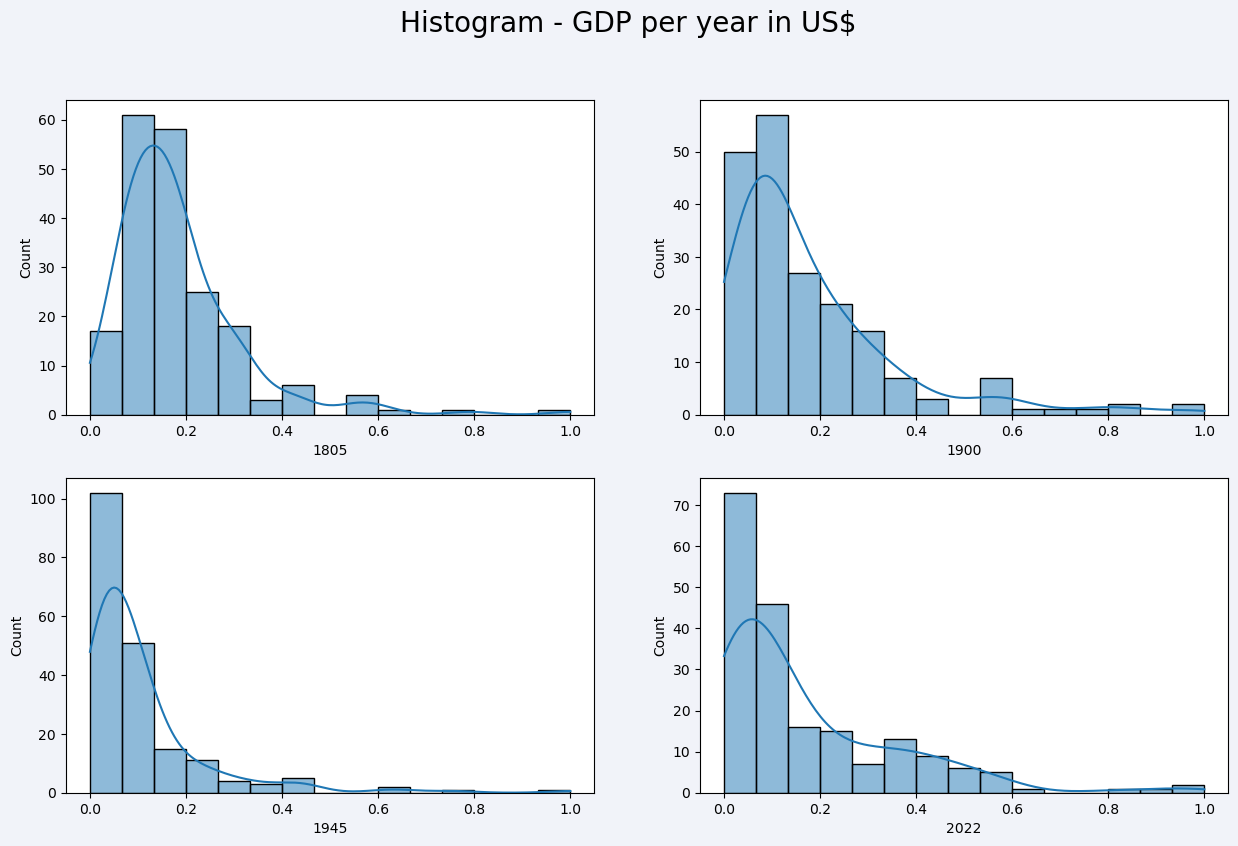

In [61]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.histplot(data=norm_df, x="1805", bins=15, kde=True, ax=ax1)
sns.histplot(data=norm_df, x="1900", bins=15, kde=True, ax=ax2)
sns.histplot(data=norm_df, x="1945", bins=15, kde=True, ax=ax3)
sns.histplot(data=norm_df, x="2022", bins=15, kde=True, ax=ax4)

fig.suptitle("Histogram - GDP per year in US$", fontsize=20)
plt.show()

In [62]:
norm_life_df = life_data.set_index("country").dropna(axis=1)
norm_life_df = (norm_life_df - norm_life_df.min())  / (norm_life_df.max() - norm_life_df.min())
norm_life_df

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.275000,0.340249,0.300221,0.257075,0.241050,0.251196,0.248193,0.266509,0.303371,0.225564,...,0.551181,0.365714,0.378151,0.395604,0.393443,0.374302,0.355301,0.364431,0.338323,0.348485
Angola,0.340909,0.396266,0.355408,0.306604,0.295943,0.289474,0.286747,0.301887,0.334831,0.260652,...,0.545276,0.360000,0.378151,0.401099,0.423497,0.418994,0.409742,0.402332,0.395210,0.403030
Albania,0.490909,0.562241,0.551876,0.537736,0.546539,0.547847,0.583133,0.620283,0.674157,0.651629,...,0.897638,0.854286,0.848739,0.846154,0.838798,0.826816,0.819484,0.813411,0.808383,0.809091
Andorra,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.970472,0.962857,0.952381,0.947802,0.942623,0.935754,0.931232,0.924198,0.919162,0.921212
United Arab Emirates,0.631818,0.663900,0.642384,0.615566,0.610979,0.610048,0.602410,0.620283,0.642697,0.601504,...,0.753937,0.651429,0.652661,0.662088,0.696721,0.689944,0.681948,0.673469,0.667665,0.669697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,0.540909,0.591286,0.573951,0.554245,0.558473,0.569378,0.590361,0.613208,0.642697,0.614035,...,0.730315,0.614286,0.607843,0.615385,0.614754,0.603352,0.590258,0.580175,0.568862,0.566667
Yemen,0.029545,0.120332,0.068433,0.009434,0.000000,0.000000,0.000000,0.033019,0.089888,0.000000,...,0.690945,0.560000,0.560224,0.574176,0.573770,0.550279,0.512894,0.492711,0.440120,0.481818
South Africa,0.488636,0.535270,0.505519,0.474057,0.470167,0.468900,0.469880,0.483491,0.507865,0.453634,...,0.484252,0.300000,0.341737,0.379121,0.390710,0.385475,0.375358,0.373178,0.389222,0.403030


In [63]:
standard_life_df = life_data.set_index("country").dropna(axis=1)
standard_life_df = (standard_life_df - standard_life_df.mean())  / (standard_life_df.std())
standard_life_df

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.936175,-0.922743,-0.964475,-0.985957,-1.057147,-1.037186,-1.059238,-1.074910,-1.096672,-1.125937,...,-1.142588,-1.215255,-1.222867,-1.210942,-1.242065,-1.305476,-1.351794,-1.293766,-1.384704,-1.363819
Angola,-0.657539,-0.666682,-0.728416,-0.786879,-0.839036,-0.884666,-0.906632,-0.931330,-0.964104,-0.991569,...,-1.177055,-1.239822,-1.222867,-1.185635,-1.101828,-1.096117,-1.098346,-1.116619,-1.119831,-1.106978
Albania,-0.023404,0.092016,0.111952,0.142150,0.156690,0.144845,0.266521,0.360889,0.465736,0.505677,...,0.879462,0.885236,0.876442,0.864180,0.835998,0.814287,0.809189,0.804743,0.803985,0.805061
Andorra,2.128812,2.093083,2.028748,2.000208,1.958480,1.946490,1.916567,1.901980,1.838762,1.839762,...,1.304553,1.352012,1.338790,1.332347,1.320454,1.324600,1.329425,1.322557,1.319791,1.333012
United Arab Emirates,0.572298,0.556719,0.499088,0.454986,0.412734,0.392691,0.342824,0.360889,0.333168,0.313723,...,0.040771,0.013102,0.001730,0.016417,0.173058,0.173124,0.168897,0.150662,0.148772,0.148690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,0.187974,0.224789,0.206376,0.208509,0.204106,0.230638,0.295135,0.332173,0.333168,0.361711,...,-0.097096,-0.146584,-0.198204,-0.198687,-0.209408,-0.232510,-0.257963,-0.285392,-0.311271,-0.336454
Yemen,-1.973850,-1.928018,-1.955921,-1.981345,-2.014941,-2.038100,-2.041635,-2.022538,-1.996241,-1.989733,...,-0.326875,-0.379972,-0.410634,-0.388485,-0.400641,-0.481124,-0.618127,-0.694192,-0.910721,-0.735985
South Africa,-0.033012,-0.031272,-0.086337,-0.113807,-0.146769,-0.169728,-0.181757,-0.194287,-0.234980,-0.252543,...,-1.533212,-1.497777,-1.385313,-1.286861,-1.254814,-1.253136,-1.258418,-1.252886,-1.147713,-1.106978


### 2. Identifier les outliers (typiquement > 3 std)

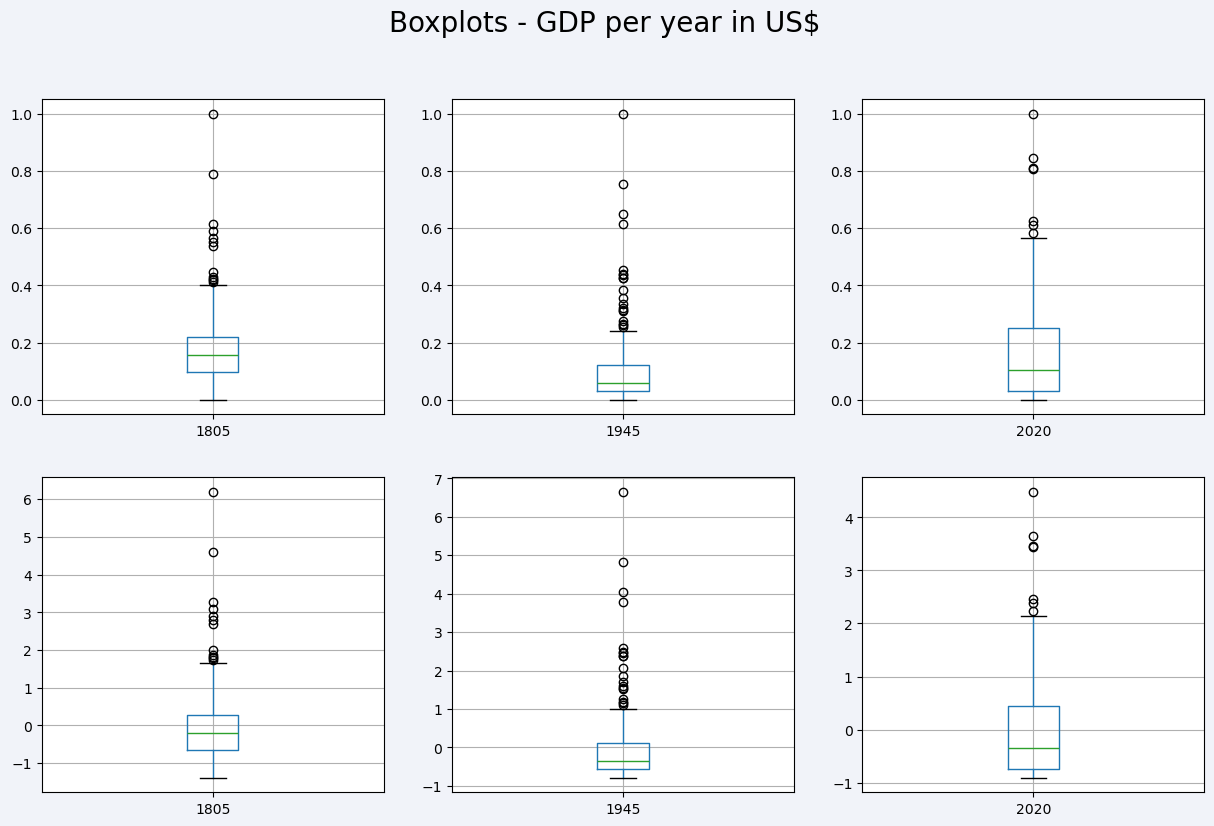

In [64]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

norm_df.boxplot(column=["1805"], ax=ax1)
norm_df.boxplot(column=["1945"], ax=ax2)
norm_df.boxplot(column=["2020"], ax=ax3)
standard_df.boxplot(column=["1805"], ax=ax4)
standard_df.boxplot(column=["1945"], ax=ax5)
standard_df.boxplot(column=["2020"], ax=ax6)

fig.suptitle("Boxplots - GDP per year in US$", fontsize=20)

plt.show()

In [65]:
standard_df = data_modified.set_index("country").dropna(axis=1)
standard_df = (standard_df - standard_df.mean())  / (standard_df.std())

threshold = 3

outliers = data_modified[standard_df > threshold]
outliers

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### another way:

In [66]:
from scipy import stats

z_df = data_modified.set_index("country").dropna(axis=1)

z = np.abs(stats.zscore(z_df))

threshold = 3
outliers = z_df[z > threshold]

outliers

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Tracer les histogrammes obtenus sans outliers

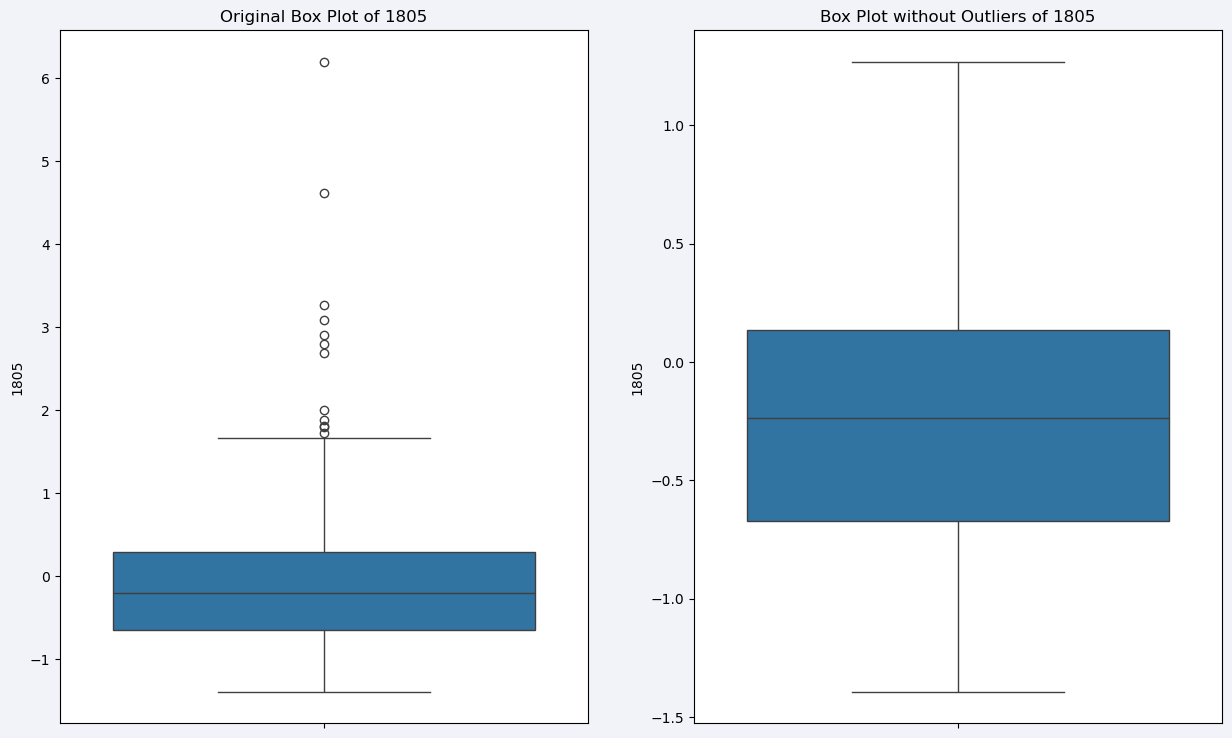

In [67]:
def removal_box_plot(df, column, threshold):

	fig = plt.figure()
	ax1 = fig.add_subplot(1, 2, 1)
	ax2 = fig.add_subplot(1, 2, 2)
	
	sns.boxplot(df[column], ax=ax1)
	ax1.title.set_text(f'Original Box Plot of {column}')

	removed_outliers = df[df[column] <= threshold]
	removed_outliers = removed_outliers[removed_outliers[column] >= -threshold]

	sns.boxplot(removed_outliers[column], ax=ax2)
	ax2.title.set_text(f'Box Plot without Outliers of {column}')
	plt.show()

	return removed_outliers

threshold_value = 1.56

no_outliers = removal_box_plot(standard_df, '1805', threshold_value)

## Visualisation : Scatter Plot 

### Théorie

Le scatter plot est une représentation graphique permettant de visualiser de manière très efficace le comportement conjoint de deux variables. 


La ressource indiquée est très explicite. 


**Ressource :** <br>
- https://chartio.com/learn/charts/what-is-a-scatter-plot/

### Mise en pratique 

&#x1F4A5; **To Do :** 

    1. Tracer un scatter plot de l'espérance de vie en fonction des revenus moyens par pays pour les années 1805, 1900, 1945 et 2022.
    
    2. Analysez vos réultats. Quel est le type de relation observé ? Indépendance ? Lien ? Relation linéaire ? 

### 1. Tracer un scatter plot de l'espérance de vie en fonction des revenus moyens par pays pour les années 1805, 1900, 1945 et 2022.

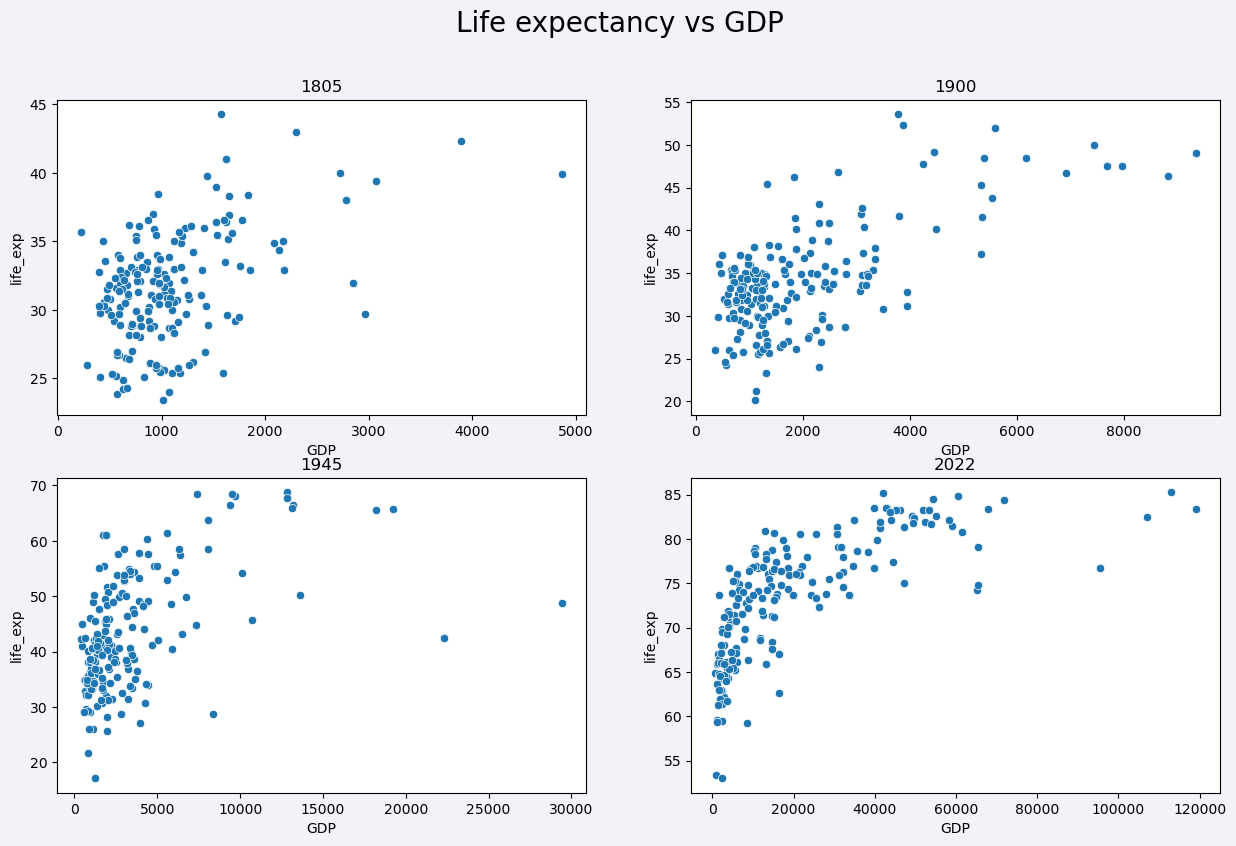

In [68]:
df_merged = data_modified.merge(life_data, on=["country"])

fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.scatterplot(data=df_merged, x="1805_x", y="1805_y", ax=ax1)
sns.scatterplot(data=df_merged, x="1900_x", y="1900_y", ax=ax2)
sns.scatterplot(data=df_merged, x="1945_x", y="1945_y", ax=ax3)
sns.scatterplot(data=df_merged, x="2022_x", y="2022_y", ax=ax4)

ax1.title.set_text(f'1805')
ax2.title.set_text(f'1900')
ax3.title.set_text(f'1945')
ax4.title.set_text(f'2022')

ax1.set(xlabel='GDP', ylabel='life_exp')
ax2.set(xlabel='GDP', ylabel='life_exp')
ax3.set(xlabel='GDP', ylabel='life_exp')
ax4.set(xlabel='GDP', ylabel='life_exp')

fig.suptitle("Life expectancy vs GDP", fontsize=20)

plt.show()

## Correlations

### Théorie

La **covariance** est une mesure statistique permettant de quantifier la variation simultanée de deux variables. C'est une outil très commun permettant de décrire le lien linéaire entre deux variables sans faire d'hypothèses de **causalité**. 

La mesure la plus souvent utilisée est sa version normalisée : la **corrélation**. Voici la formule qui fait peur : 

$$r = \frac{ \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{%
        \sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}$$

<br>

Vous avez le droit de demander une explication au formateur ! 

<br>

--- 

Valeur de la corrélation : 
- La corrélation est sans unité
- La valeur de la corraltion est comprise entre -1 et +1. 
- Une valeur proche de 1 signifie que les variables d'étude augmentent ensemble. 
- Une valeur proche de -1 signifie que lorsque la valeur d'une des deux variables augmente, l'autre diminue.  
- Une valeur proche de 0 indique que les deux variables ne sont pas reliées de manière linéaire. 

--- 

**Attention :**

- Un coefficient nul n’implique pas indépendance, car d’autres types de corrélation sont possibles. En voici plusieurs exemples :

<img width=600 src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1000px-Correlation_examples2.svg.png'>

- Le fait que deux variables soient « fortement corrélées » **NE DEMONTRE PAS** qu'il y ait une relation de causalité entre l'une et l'autre. Le contre-exemple le plus typique est celui où elles sont en fait liées par une causalité commune. **Exemple classique : la très forte corrélation entre la vente de crème glacée et le nombre de noyades en Espagne (saurez-vous trouver l'explication ?) 

<img width=400 src="https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fbucketeer-e05bbc84-baa3-437e-9518-adb32be77984.s3.amazonaws.com%2Fpublic%2Fimages%2F5de4b9d9-d040-4ee6-a015-84dbdc95aa14_700x637.png">

- Attention aux conclusions hâtives. Voici plusieurs ensembles de points avec la même corrélation ( corrélation = 0,816) 

<img width=400 src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1000px-Anscombe%27s_quartet_3.svg.png'> 

**En bref :**
- Corrélation ne signifie pas causalité
- La corrélation (de Pearson) ne mesure que la tendance linéaire. D'autres méthodes existent pour mesurer la corrélation comme la corrélation de Spearman, basée sur les rangs des données.

**Ressources :** <br>
- https://en.wikipedia.org/wiki/Correlation
- https://www.jmp.com/en_ca/statistics-knowledge-portal/what-is-correlation.html
- https://datascientest.com/correlations-de-pearson-et-de-spearman

### Application pratique

&#x1F4A5; **To Do :** 

1. Prenez un subset des pays puis calculez la corrélation des revenus entre chaque pays. 


2. Afficher le résultat sur une heatmap.


3. Prenez cette fois l'ensemble des pays et calculez la corrélation entre chaque pays. 


4. Tracez un historamme de corrélations. Que pouvez-vous conclure de cette histogramme ? A votre avis, quel est le signe de la skewness ?


5. Trouvez les pays dont les revenus sont en moyenne les moins corrélés aux autres. 


6. Trouvez les paires de pays dont les revenus sont les moins corrélés. 


7. Tracez l'évolution de la corrélation entre revenus et espérance de vie au cours du temps. 


**Ressource :**  
- https://seaborn.pydata.org/generated/seaborn.heatmap.html
- https://numpy.org/doc/stable/reference/generated/numpy.triu.html

### 1. Prenez un subset des pays puis calculez la corrélation des revenus entre chaque pays.

In [69]:
some_countries = data_modified["country"].sample(20, random_state=42)
some_countries

138               Palau
16             Bulgaria
155         El Salvador
96                  Lao
68               Greece
153     Solomon Islands
55             Ethiopia
15           Bangladesh
112    Marshall Islands
111              Mexico
184       United States
18              Bahamas
82              Iceland
9               Austria
164              Sweden
117          Montenegro
69              Grenada
113     North Macedonia
192        South Africa
119          Mozambique
Name: country, dtype: object

In [70]:
some_data = data_modified[data_modified["country"].isin(some_countries)].set_index("country")
some_data

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
country,,,,,,,,,,,,,,,,,,,,,
Austria,2090,2100,2110,2120,2130,2130,2140,2150,2160,2170,...,77800,79500,81200,83000,84700,86600,88400,90300,92300,94300
Bangladesh,992,992,992,992,992,992,992,992,992,991,...,11100,11300,11500,11800,12000,12300,12600,12800,13100,13400
Bulgaria,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,...,42100,43000,43900,44800,45800,46800,47800,48800,49900,50900
Bahamas,1640,1640,1640,1640,1640,1640,1640,1640,1640,1640,...,45300,46300,47300,48300,49300,50400,51500,52600,53700,54900
Ethiopia,592,592,592,592,592,592,592,592,592,592,...,4720,4820,4920,5030,5140,5250,5360,5480,5590,5710
Greece,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,...,44900,45900,46900,47900,48900,50000,51100,52200,53300,54400
Grenada,1090,1090,1090,1090,1090,1090,1090,1090,1090,1090,...,24400,24900,25500,26000,26600,27100,27700,28300,28900,29600
Iceland,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,...,81200,83000,84800,86600,88500,90400,92300,94300,96300,98400
Lao,978,979,979,979,979,979,979,979,980,980,...,12600,12900,13100,13400,13700,14000,14300,14600,14900,15300


In [71]:
correlations = some_data.T.corr()
correlations

country,Austria,Bangladesh,Bulgaria,Bahamas,Ethiopia,Greece,Grenada,Iceland,Lao,Mexico,Marshall Islands,North Macedonia,Montenegro,Mozambique,Palau,Solomon Islands,El Salvador,Sweden,United States,South Africa
country,,,,,,,,,,,,,,,,,,,,
Austria,1.000000,0.875368,0.967385,0.940097,0.867553,0.993920,0.984756,0.996434,0.918604,0.992943,0.981696,0.978156,0.978522,0.867874,0.672673,0.962250,0.989217,0.994848,0.992674,0.933476
Bangladesh,0.875368,1.000000,0.955293,0.705569,0.994515,0.842630,0.934225,0.893958,0.986163,0.831427,0.835046,0.924655,0.934834,0.994280,0.471008,0.766786,0.903497,0.877085,0.890923,0.725999
Bulgaria,0.967385,0.955293,1.000000,0.870146,0.958916,0.950123,0.979365,0.978197,0.969282,0.949419,0.948930,0.994572,0.992982,0.948421,0.655414,0.898609,0.983876,0.972302,0.974355,0.886369
Bahamas,0.940097,0.705569,0.870146,1.000000,0.712124,0.951699,0.875868,0.935783,0.752517,0.967460,0.970686,0.907465,0.886363,0.695664,0.794586,0.972682,0.930699,0.950035,0.939538,0.981353
Ethiopia,0.867553,0.994515,0.958916,0.712124,1.000000,0.832856,0.921508,0.890668,0.978657,0.828651,0.839191,0.929528,0.932977,0.989140,0.522574,0.763705,0.906413,0.877181,0.888593,0.743832
Greece,0.993920,0.842630,0.950123,0.951699,0.832856,1.000000,0.969702,0.988059,0.885466,0.992303,0.978295,0.966483,0.965805,0.837318,0.688017,0.959497,0.977545,0.987099,0.981966,0.936896
Grenada,0.984756,0.934225,0.979365,0.875868,0.921508,0.969702,1.000000,0.987440,0.967964,0.961037,0.949248,0.974617,0.984704,0.927971,0.582682,0.917341,0.978839,0.977773,0.980582,0.873302
Iceland,0.996434,0.893958,0.978197,0.935783,0.890668,0.988059,0.987440,1.000000,0.931021,0.989364,0.982848,0.986320,0.985147,0.887040,0.681193,0.956864,0.994186,0.997551,0.996095,0.936953
Lao,0.918604,0.986163,0.969282,0.752517,0.978657,0.885466,0.967964,0.931021,1.000000,0.876662,0.870452,0.943732,0.958480,0.979520,0.486886,0.815231,0.932762,0.915559,0.924715,0.770255


### 2. Afficher le résultat sur une heatmap.

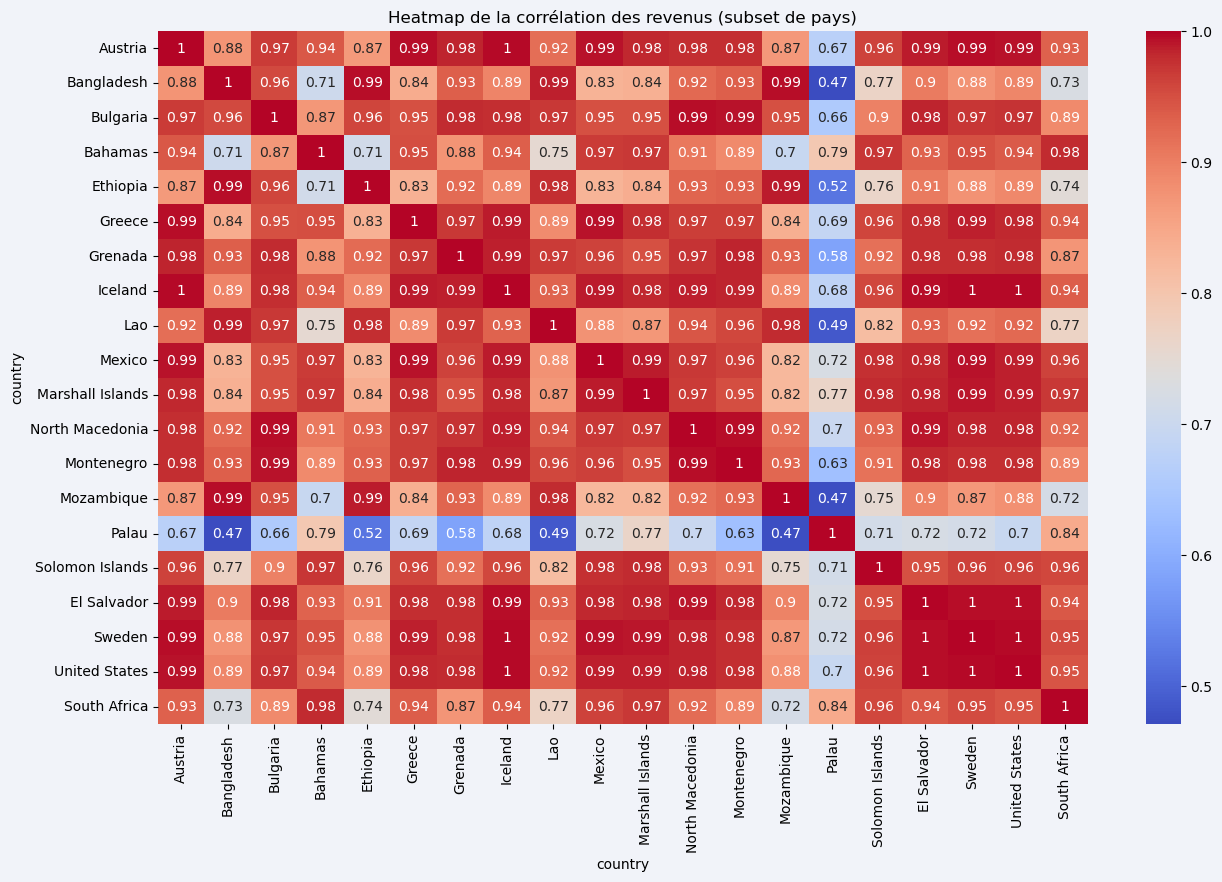

In [72]:
plt.figure()
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Heatmap de la corrélation des revenus (subset de pays)')
plt.show()

### 3. Prenez cette fois l'ensemble des pays et calculez la corrélation entre chaque pays.

In [73]:
all_data = data_modified.set_index("country")
correlations_all_data = all_data.T.corr(method='pearson')

#plt.figure()
#sns.heatmap(correlations_all_data, annot=True, cmap='coolwarm')
#plt.title('Heatmap de la corrélation des revenus')
#plt.show()

### 4. Tracez un historamme de corrélations. Que pouvez-vous conclure de cette histogramme ? A votre avis, quel est le signe de la skewness ?

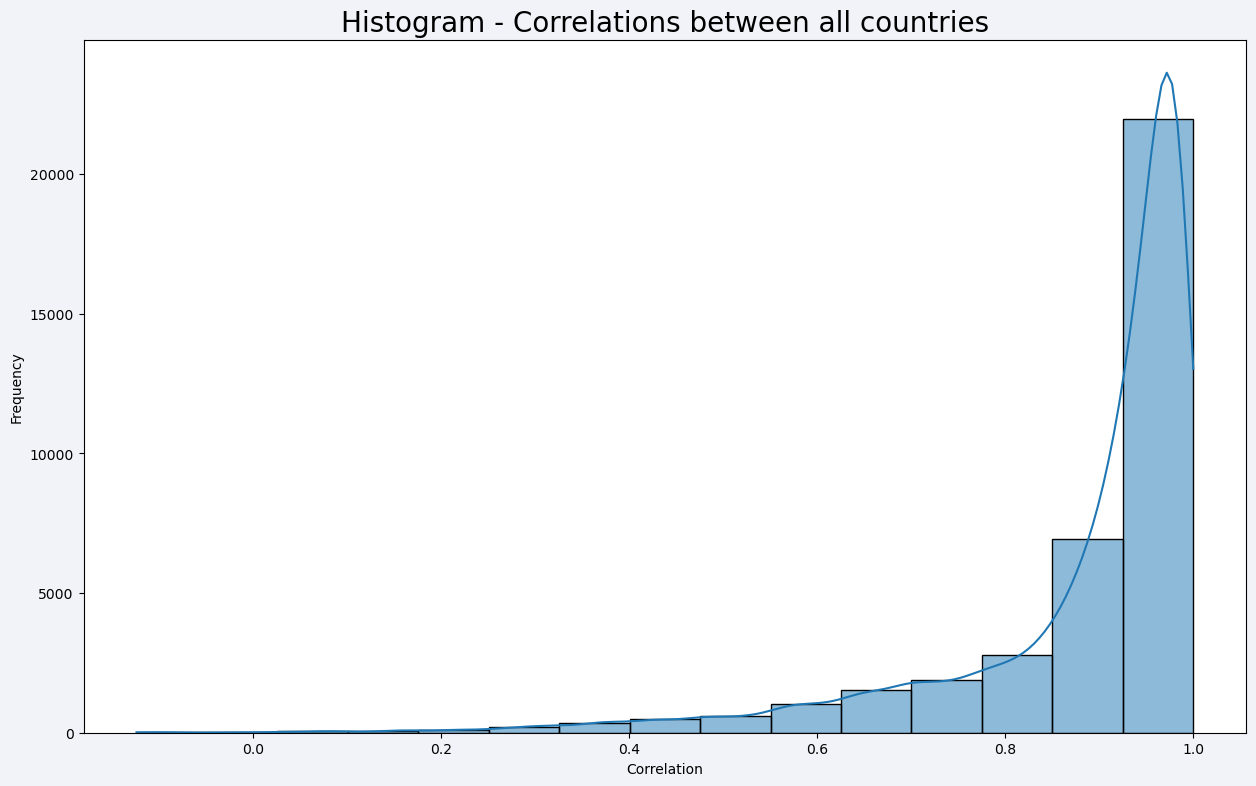

In [88]:
fig = plt.figure()

ax = fig.add_subplot()

#sns.histplot(data=correlations_all_data, bins=15, kde=True, ax=ax)
sns.histplot(data=correlations_all_data.values.flatten(), bins=15, kde=True, ax=ax)

plt.title("Histogram - Correlations between all countries", fontsize=20)

plt.xlabel('Correlation')
plt.ylabel('Frequency')

plt.show()

In [75]:
skewness = pd.Series(correlations_all_data.values.flatten()).skew()
skewness

-2.2898705148512537

### 5. Trouvez les pays dont les revenus sont en moyenne les moins corrélés aux autres.

In [76]:
correlations_all_data.head()

country,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,...,Uzbekistan,St. Vincent and the Grenadines,Venezuela,Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.000000,0.903270,0.908299,0.858201,0.782313,0.881572,0.935971,0.799597,0.887864,0.838696,...,0.923865,0.879761,0.162125,0.879104,0.775119,0.917734,0.535016,0.832755,0.920880,0.731138
Angola,0.903270,1.000000,0.932366,0.928294,0.810171,0.920964,0.929167,0.909201,0.936683,0.924534,...,0.916223,0.944909,0.273509,0.881190,0.841877,0.947424,0.656831,0.875389,0.952270,0.793875
Albania,0.908299,0.932366,1.000000,0.921626,0.791047,0.913581,0.979442,0.922876,0.959552,0.947041,...,0.973290,0.983385,0.059911,0.985750,0.816768,0.954574,0.610384,0.838220,0.964933,0.837616
Andorra,0.858201,0.928294,0.921626,1.000000,0.940043,0.981234,0.938630,0.958276,0.978623,0.977756,...,0.951826,0.948396,0.413831,0.847969,0.953588,0.973233,0.806432,0.970521,0.981960,0.946504
United Arab Emirates,0.782313,0.810171,0.791047,0.940043,1.000000,0.928280,0.860834,0.845646,0.886895,0.875022,...,0.880287,0.821859,0.573404,0.703469,0.925134,0.908249,0.818280,0.965880,0.904784,0.911532


In [77]:
mean_correlation = correlations_all_data.mean().sort_values()
mean_correlation

country
Venezuela                   0.285905
Nauru                       0.441970
Congo, Dem. Rep.            0.448492
Syria                       0.540090
Central African Republic    0.554915
                              ...   
Malawi                      0.934369
United States               0.934670
Sweden                      0.935194
Fiji                        0.936112
El Salvador                 0.937066
Length: 195, dtype: float64

In [78]:
mean_correlation.mean()

0.8813223449600107

In [79]:
least_correlated = mean_correlation.head(10)
least_correlated

country
Venezuela                   0.285905
Nauru                       0.441970
Congo, Dem. Rep.            0.448492
Syria                       0.540090
Central African Republic    0.554915
Kiribati                    0.581992
Equatorial Guinea           0.631280
North Korea                 0.666938
Liberia                     0.670359
Palau                       0.681452
dtype: float64

### 6. Trouvez les paires de pays dont les revenus sont les moins corrélés.

In [80]:
correlations_all_data.unstack()

country      country             
Afghanistan  Afghanistan             1.000000
             Angola                  0.903270
             Albania                 0.908299
             Andorra                 0.858201
             United Arab Emirates    0.782313
                                       ...   
Zimbabwe     Samoa                   0.903943
             Yemen                   0.872337
             South Africa            0.942252
             Zambia                  0.911423
             Zimbabwe                1.000000
Length: 38025, dtype: float64

In [81]:
correlations_all_data.unstack().sort_values()

country        country      
Myanmar        Venezuela       -0.123932
Venezuela      Myanmar         -0.123932
Bangladesh     Venezuela       -0.120861
Venezuela      Bangladesh      -0.120861
China          Venezuela       -0.112413
                                  ...   
Uganda         Uganda           1.000000
Tanzania       Tanzania         1.000000
Uzbekistan     Uzbekistan       1.000000
United States  United States    1.000000
Andorra        Andorra          1.000000
Length: 38025, dtype: float64

In [82]:
least_correlated_pairs = correlations_all_data.unstack().sort_values().head(20).drop_duplicates()
least_correlated_pairs

country     country   
Myanmar     Venezuela    -0.123932
Bangladesh  Venezuela    -0.120861
China       Venezuela    -0.112413
Venezuela   Mozambique   -0.107484
            Ethiopia     -0.091455
            Vietnam      -0.090801
            India        -0.087338
            Lao          -0.044482
            Rwanda       -0.037663
            Bhutan       -0.021187
dtype: float64

### 7. Tracez l'évolution de la corrélation entre revenus et espérance de vie au cours du temps.

In [83]:
life_data.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


In [84]:
years = data_modified.columns[1:]
correlations = []

for year in years:
    income = data_modified.set_index('country')[year]
    life_expectancy = life_data.set_index('country')[year]
    common_countries = income.index.intersection(life_expectancy.index)
    correlation = income.loc[common_countries].corr(life_expectancy.loc[common_countries])
    correlations.append(correlation)

In [85]:
correlations

[0.42098606501712615,
 0.43870825331076485,
 0.4484455714547822,
 0.41296561929271497,
 0.43529560910132387,
 0.46003504665067857,
 0.4479562727288001,
 0.4397240525912657,
 0.37973071215210724,
 0.3813838307550481,
 0.43077358943196914,
 0.4398426463117131,
 0.4319699663100337,
 0.452410645670943,
 0.4319447185952682,
 0.44726131534000535,
 0.46067790640820455,
 0.4485882682344333,
 0.41724142144846943,
 0.41163795581203366,
 0.4297718321802393,
 0.462625921307143,
 0.4454237372144566,
 0.44933316160400755,
 0.451990287190413,
 0.4608685664086595,
 0.4561273814084201,
 0.46442226087556526,
 0.46803553166930467,
 0.4561061685529948,
 0.46948004421394857,
 0.4413484259857616,
 0.43290259132001496,
 0.4417990214396618,
 0.46083437176777403,
 0.47109226351048245,
 0.48390904902019194,
 0.48731407964134604,
 0.4946527019435137,
 0.4924478268133605,
 0.4911805370827021,
 0.48810223858099133,
 0.48209236861634636,
 0.4968399663137604,
 0.4810105089216758,
 0.49990110323120474,
 0.44492269158

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


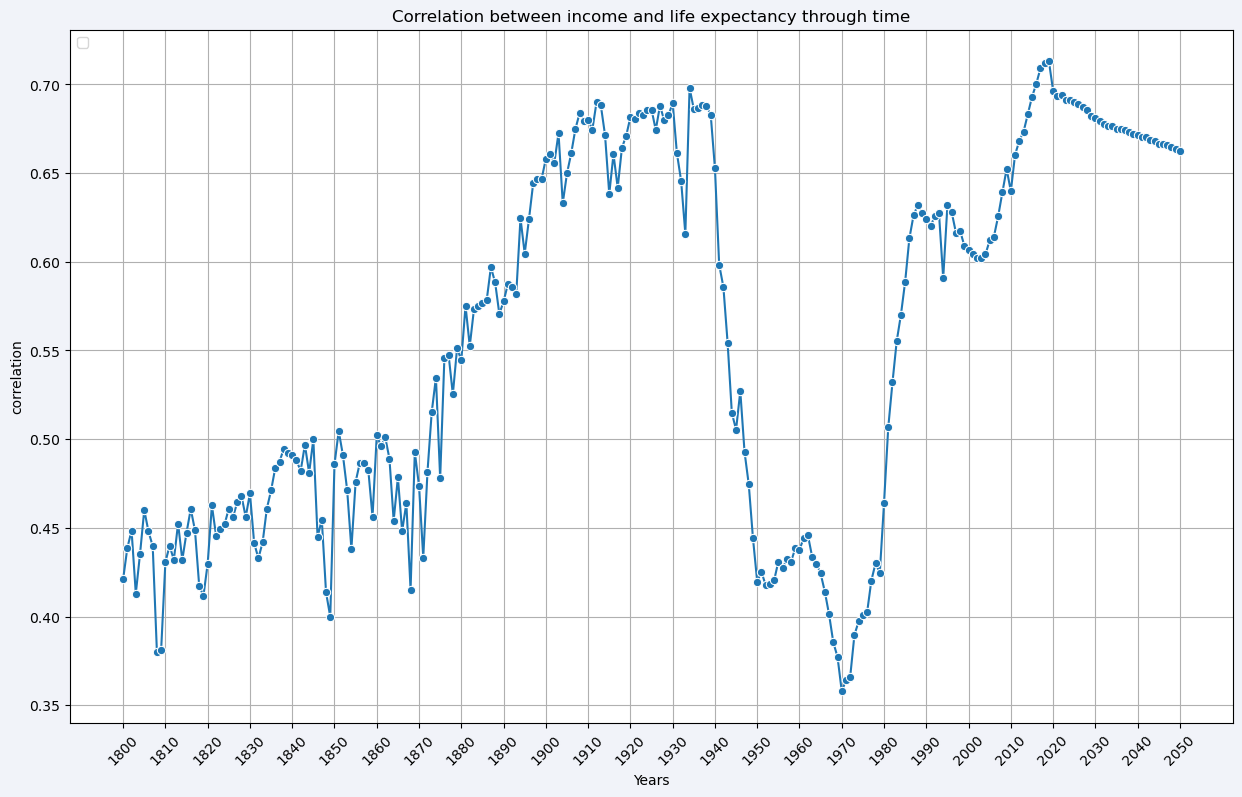

In [86]:
# Tracer l'évolution de la corrélation au fil du temps

corr_years = pd.DataFrame(
    {"year": list(years),
    "corr": list(correlations)}
)

x_axis = [year for year in range(1800, 2051, 1)]

fig = plt.figure()

ax = fig.add_subplot()

sns.lineplot(corr_years, x=x_axis, y="corr", marker='o', ax=ax)

ax.legend(loc="upper left")
ax.set_xlabel("Years")
ax.set_ylabel("correlation")
ax.set_title("Correlation between income and life expectancy through time")
plt.xticks(np.arange(1800, 2051, 10), rotation=45)
plt.grid(True)

plt.show()

In [87]:



plt.show()